# ***Projet 10 - DETECTION DE FAUX BILLETS - PREPARATION***


---
# Partie 1 - Importation / Préparation

## 1. Import des librairies et run des fonctions (ok)
---

In [1]:
# Petite fonction pour ne pas afficher les FutureWarning (adaptable selon les warning que l'on veux ou non)
import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

In [2]:
# Lancement de mon book avec mes fonctions perso
# Importe également les librairies nécessaires (une sorte de boite à outil)
# %run DsFx_fct.ipynb
%run GESSER_David_2_DsFx_fct_102023.ipynb

fct_test()
fct_load()

Librairies utilisées :
+-------------------------------------+
    Pandas : 2.0.3
     Numpy : 1.24.3
Matplotlib : 3.7.2
   Seaborn : 0.12.2
     Spicy : 1.11.1
Statmodels : 0.14.0
   Sklearn : 1.3.0
    JobLib : 1.2.0
+-------------------------------------+


+--o=      Test run DsFx_fct      =o--+

+-------------------------------------+
|   Import lib : OK - Loaded          |
|      Run fct : OK - Loaded          |
+-------------------------------------+
                                       
_______________________________________
 _    __    _                          
| \ _|_   _|___|_  o  | _  _  _| _  _| 
|_/_>|><___|(_ |_  o  |(_)(_|(_|(/_(_| 
 _                                 ... 
|_) _  _  _|\/ _|_ _      _ _      ||| 
| \(/_(_|(_|/   |_(_) |_|_>(/_     000 
_______________________________________


In [3]:
# Lexique à titre perso :

# data_... : Données importées brutes, permet de revenir aux données de bases si besoin
# df_... : Dataframe sur lequel j'ai déjà appliqué des modifications
# fct_... : Fonctions perso codées dans un book à part
# palette : OrRd, seismic, RdGy
# random_state : 0 - 1884 (selon  besoin pour reproductibilité, 0 pour train_test_split, 1884 pour les algos)

## 2. Import des données (ok)
---

### *2.1. Import du dataset (ok)*

In [4]:
# Import du csv fourni
# Il s'agit d'unéchantillon de billet avec leurs dimensions et si il s'agit de vrais ou de faux
data_billets = pd.read_csv('billets.csv', sep = ';')

In [5]:
# Visu de base du dataset, informations de bases .head(), .info(), .describe()
fct_first_look(data_billets)

Visu du dataset (entête) :


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
577        True    172.01       103.62        103.26        4.91       2.86   
43         True    172.40       103.41        103.85        4.01       3.15   
997        True    171.78       103.38        104.22        4.23       3.07   
64         True    171.79       103.91        103.94        3.44       2.96   

     length  
577  113.16  
43   113.45  
997  113.77  
64   113.39


+-----------------------------------+
Infos sur le df :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


None


+-----------------------------------+
Nombre de valeurs NaN


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


+-----------------------------------+
Déscription du df (include = 'all')


is_genuine   diagonal  height_left  height_right  margin_low  \
count        1500  1500.0000    1500.0000     1500.0000   1463.0000   
unique          2        NaN          NaN           NaN         NaN   
top          True        NaN          NaN           NaN         NaN   
freq         1000        NaN          NaN           NaN         NaN   
mean          NaN   171.9584     104.0295      103.9203      4.4860   
std           NaN     0.3052       0.2995        0.3256      0.6638   
min           NaN   171.0400     103.1400      102.8200      2.9800   
25%           NaN   171.7500     103.8200      103.7100      4.0150   
50%           NaN   171.9600     104.0400      103.9200      4.3100   
75%           NaN   172.1700     104.2300      104.1500      4.8700   
max           NaN   173.0100     104.8800      104.9500      6.9000   

        margin_up     length  
count   1500.0000  1500.0000  
unique        NaN        NaN  
top           NaN        NaN  
freq          NaN        NaN  
mean       3.1515   112.6785  
std        0.2318     0.8727  
min        2.2700   109.4900  
25%        2.9900   112.0300  
50%        3.1400   112.9600  
75%        3.3100   113.3400  
max        3.9100   114.4400

In [6]:
# Notre dataset de départ comporte 1500 billets avec leurs caractéristiques dimensionelles ainsi que leur état (Vrai/Faux)
# Les dimmensions du dataset sont de 1500 individus sur 7 variables
# On remarque des données manquantes margin_low (37 données)
# Toutes les variables sont de type float (ce qui est normal car ce sont des dimensions en mm) à l'exception de is_genuine qui est un bool, réprésente la catégorie d'un billet : vrai/faux

### *2.2. Exploration du dataset (ok)*

In [7]:
# On travaillera sur les donnes de bases : data_...

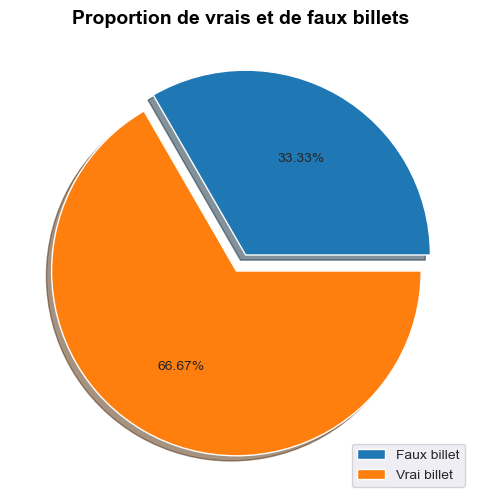

In [8]:
# Graph de proportion vrais et faux
fig, ax = plt.subplots(1, 1, figsize = (12,6))

plt.pie(data = data_billets.groupby('is_genuine').count(), x = 'diagonal', explode = (0.05, 0.05), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['Faux billet', 'Vrai billet'])

plt.title('Proportion de vrais et de faux billets', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()

In [9]:
# Infos sur les vrais billets
fct_first_look(data_billets.loc[data_billets['is_genuine'] == True])

Visu du dataset (entête) :


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
784        True    172.51       103.78        103.94        4.24       3.39   
521        True    171.89       104.30        103.57        3.98       2.75   
83         True    172.52       104.32        103.86        3.70       3.14   
617        True    172.36       103.89        103.67        4.34       3.07   

     length  
784  113.13  
521  112.92  
83   113.36  
617  113.75


+-----------------------------------+
Infos sur le df :
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1000 non-null   bool   
 1   diagonal      1000 non-null   float64
 2   height_left   1000 non-null   float64
 3   height_right  1000 non-null   float64
 4   margin_low    971 non-null    float64
 5   margin_up     1000 non-null   float64
 6   length        1000 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 55.7 KB


None


+-----------------------------------+
Nombre de valeurs NaN


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      29
margin_up        0
length           0
dtype: int64


+-----------------------------------+
Déscription du df (include = 'all')


is_genuine   diagonal  height_left  height_right  margin_low  \
count        1000  1000.0000    1000.0000     1000.0000    971.0000   
unique          1        NaN          NaN           NaN         NaN   
top          True        NaN          NaN           NaN         NaN   
freq         1000        NaN          NaN           NaN         NaN   
mean          NaN   171.9871     103.9491      103.8087      4.1161   
std           NaN     0.3004       0.3002        0.2916      0.3191   
min           NaN   171.0400     103.1400      102.8200      2.9800   
25%           NaN   171.7900     103.7400      103.6100      3.9050   
50%           NaN   171.9900     103.9500      103.8100      4.1100   
75%           NaN   172.2000     104.1400      104.0000      4.3400   
max           NaN   172.9200     104.8600      104.9500      5.0400   

        margin_up     length  
count   1000.0000  1000.0000  
unique        NaN        NaN  
top           NaN        NaN  
freq          NaN        NaN  
mean       3.0521   113.2024  
std        0.1863     0.3596  
min        2.2700   111.7600  
25%        2.9300   112.9500  
50%        3.0500   113.2050  
75%        3.1800   113.4600  
max        3.7400   114.4400

In [10]:
# Infos sur les faux billets
fct_first_look(data_billets.loc[data_billets['is_genuine'] == False])

Visu du dataset (entête) :


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1165       False    171.50       104.11        104.14        5.38       3.53   
1492       False    172.01       103.97        104.40        5.52       3.31   
1017       False    171.81       104.37        104.18        5.90       3.52   
1136       False    172.41       104.32        103.93        5.82       3.36   

      length  
1165  111.24  
1492  111.18  
1017  110.95  
1136  112.36


+-----------------------------------+
Infos sur le df :
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    500 non-null    bool   
 1   diagonal      500 non-null    float64
 2   height_left   500 non-null    float64
 3   height_right  500 non-null    float64
 4   margin_low    492 non-null    float64
 5   margin_up     500 non-null    float64
 6   length        500 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 27.8 KB


None


+-----------------------------------+
Nombre de valeurs NaN


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      8
margin_up       0
length          0
dtype: int64


+-----------------------------------+
Déscription du df (include = 'all')


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
count         500  500.0000     500.0000      500.0000    492.0000   500.0000   
unique          1       NaN          NaN           NaN         NaN        NaN   
top         False       NaN          NaN           NaN         NaN        NaN   
freq          500       NaN          NaN           NaN         NaN        NaN   
mean          NaN  171.9012     104.1903      104.1436      5.2159     3.3502   
std           NaN    0.3069       0.2238        0.2709      0.5535     0.1805   
min           NaN  171.0400     103.5100      103.4300      3.8200     2.9200   
25%           NaN  171.6900     104.0400      103.9500      4.8400     3.2200   
50%           NaN  171.9100     104.1800      104.1600      5.1900     3.3500   
75%           NaN  172.0925     104.3325      104.3200      5.5925     3.4725   
max           NaN  173.0100     104.8800      104.9500      6.9000     3.9100   

          length  
count   500.0000  
unique       NaN  
top          NaN  
freq         NaN  
mean    111.6306  
std       0.6155  
min     109.4900  
25%     111.2000  
50%     111.6300  
75%     112.0300  
max     113.8500

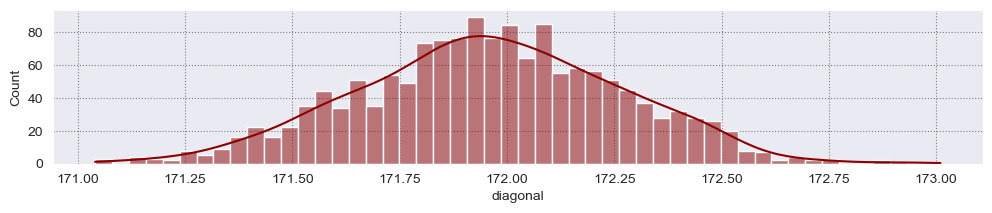

C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Résultats du test Shapiro : diagonal
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


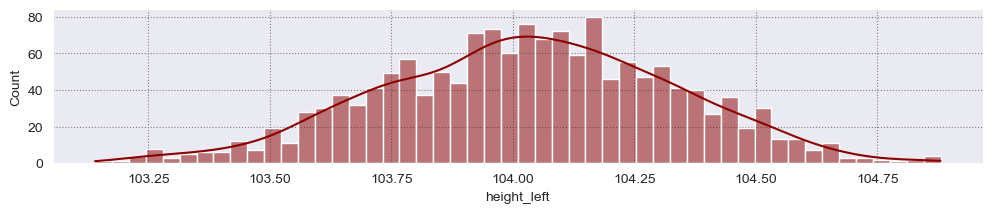

C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Résultats du test Shapiro : height_left
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


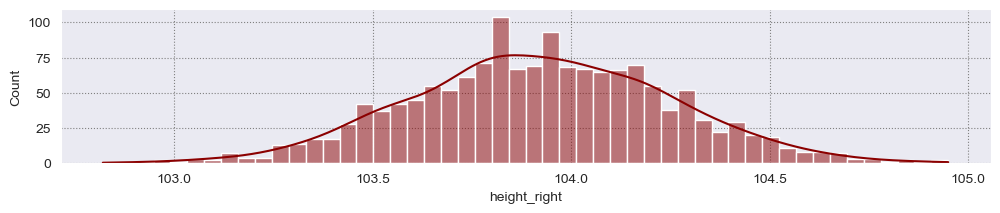

C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Résultats du test Shapiro : height_right
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


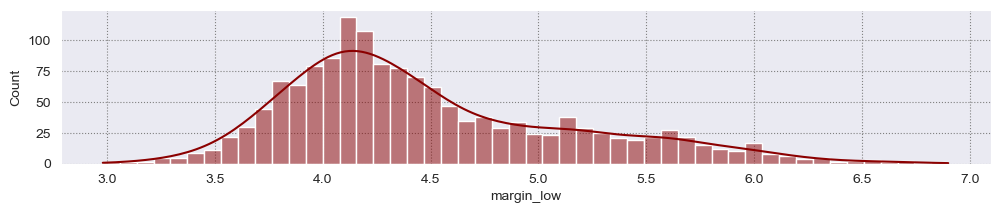

C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Résultats du test Shapiro : margin_low
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


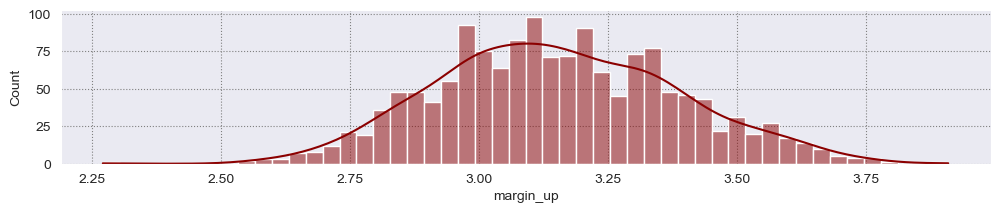

C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Résultats du test Shapiro : margin_up
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


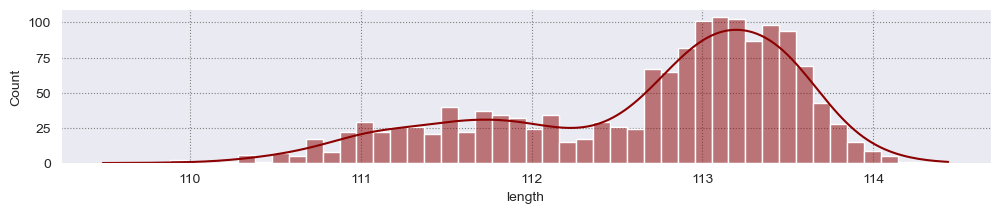

Résultats du test Shapiro : length
-----------------------------------------------------------------------------------------------
Statistique : nan
p-value : 1.0
Nombre d'individus : 1500 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------


C:\Users\david\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
# Distribution des variables (j'utilise ma fct_shapiro juste pour avoir l'histogramme de la répartition, possibilité de passer is_genuine en séparation)
%run GESSER_David_2_DsFx_fct_102023.ipynb
fct_shapiro_multi(data_billets.drop('is_genuine', axis = 1),
                  graph = True,
                  bins = 50,
                  # hue = data_billets['is_genuine']
                 )

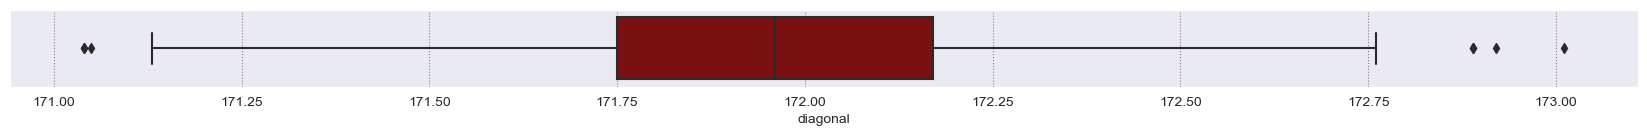

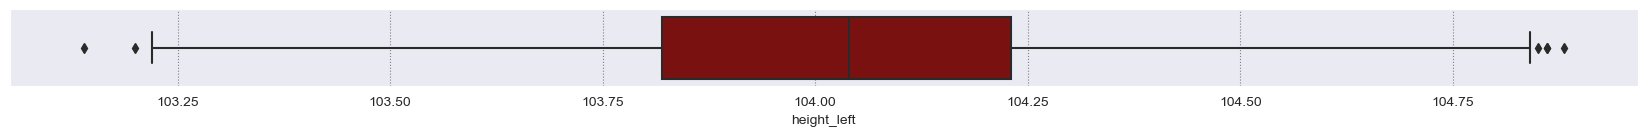

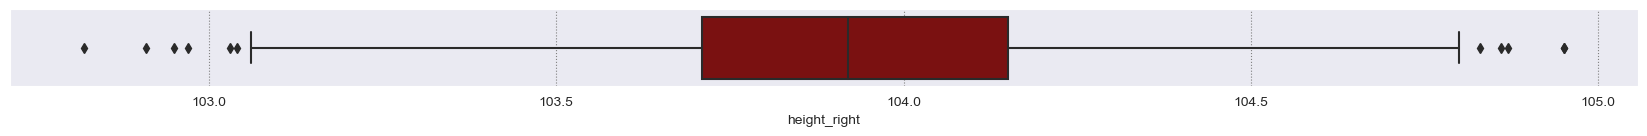

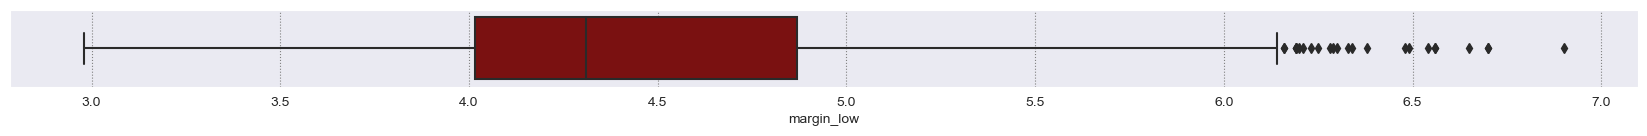

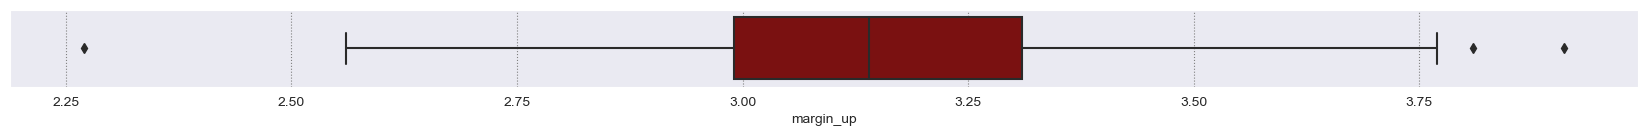

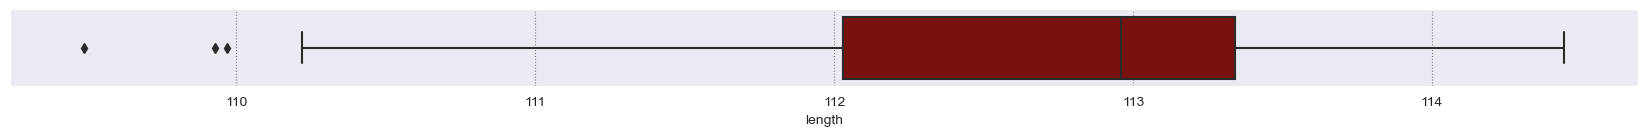

In [12]:
# Boxplot sur les variables (visu des outliers possibles)
for i in data_billets.drop('is_genuine', axis = 1).columns:
    fig, ax = plt.subplots(1, 1, figsize = (21, 1))
    
    sns.boxplot(ax = ax, data = data_billets, x = i, color = 'DarkRed')
    
    plt.show()

#### *2.2.1. Conclusions (ok)*

In [13]:
# df avec valeurs manquantes
data_billets.loc[data_billets['margin_low'].isna()].head()


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [14]:
# df sans valeurs manquantes
data_billets.loc[~data_billets['margin_low'].isna()].head()


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [15]:
# Premières informations, données manquantes :

# Le dataset comporte 1500 billets, 1000 sont vrais et 500 sont faux

# On constate qu'il y a 37 données manquantes dans margin_low, soit 2.46% du dataset
# Sur ces 37 manquants, 29 sont vrais (2.9% de tous les vrais billets) et 8 sont faux (1.6% de tous les faux billets)
# On vérifiera l'impact de cette variable pour notre analyse afin de définir la manière dont nous allons traiter ces données manquantes (imputation, suppression des lignes, ...)

In [16]:
# Premières informations, distribution des variables :

# Visuelement, les variables ne sont pas centré, mais cela est plus flagrant sur : margin_up, margin_low et lenght
# Y a-t-il une raison qui influe sur la distribution de ces variables ? Catgéorie de billet ?
# L'étendu des variables length et margin_low est importante au regard des autres variables, on pourra minimiser cela en normalisant, voir recherche d'autliers si besoin

In [17]:
# Premières informations, présence d'outliers :

# Avec un boxplot on remarque quelques outliers dans nos variables qui ne sont pas "extrêmes", cela peut être du à l'usure des billets, de légères différences de fabrication...
# On en remarque toutefois plus pour la variable margin_low, il serait pertinent d'analyser plus en profondeur cette variable (à garder en tête)

## *3. Normalisation des données (ok)*

In [18]:
# Nos données sont les dimensions de billets exprimés en mm, il y a toutefois de grand écart par exemple entre les marges et la longueur, donc il vaut mieux les normaliser (amplitude des variables et entre les variables)
# Nous alons donc les normaliser avant de continuer (moyenne = 0, ecart type = 1)
# Celz facilitera certaines choses par la suite (ML, ACP, ...)

In [19]:
# On met notre dataset de base dans un df pour travailler dessus et garder à coté nos données de base
df_billets = data_billets.copy()
# On fait un mapping sur la col is_genuine pour passer cette valeur en binaire : True = 1, False = 0
# Cela nous permettra de la prendre en compte dans les différents  modèles par la suite (ex : reg linéaire)
df_billets['is_genuine'] = df_billets['is_genuine'].map({True : 1, False : 0})
# df_billets.sample(5)

In [20]:
# Standardisation des données sauf is_genuine
df_scaled = fct_data_scaler(df_billets, columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'], method = 'standard', scaler_all = False)

In [21]:
round(df_scaled.describe(), 4)

is_genuine   diagonal  height_left  height_right  margin_low  \
count   1500.0000  1500.0000    1500.0000     1500.0000   1463.0000   
mean       0.6667    -0.0000       0.0000       -0.0000      0.0000   
std        0.4716     1.0003       1.0003        1.0003      1.0003   
min        0.0000    -3.0104      -2.9714       -3.3802     -2.2694   
25%        0.0000    -0.6832      -0.6999       -0.6461     -0.7097   
50%        1.0000     0.0051       0.0350       -0.0009     -0.2652   
75%        1.0000     0.6934       0.6696        0.7056      0.5787   
max        1.0000     3.4467       2.8409        3.1632      3.6379   

       margin_up     length  
count  1500.0000  1500.0000  
mean     -0.0000     0.0000  
std       1.0003     1.0003  
min      -3.8038    -3.6547  
25%      -0.6968    -0.7433  
50%      -0.0495     0.3227  
75%       0.6841     0.7582  
max       3.2732     2.0191

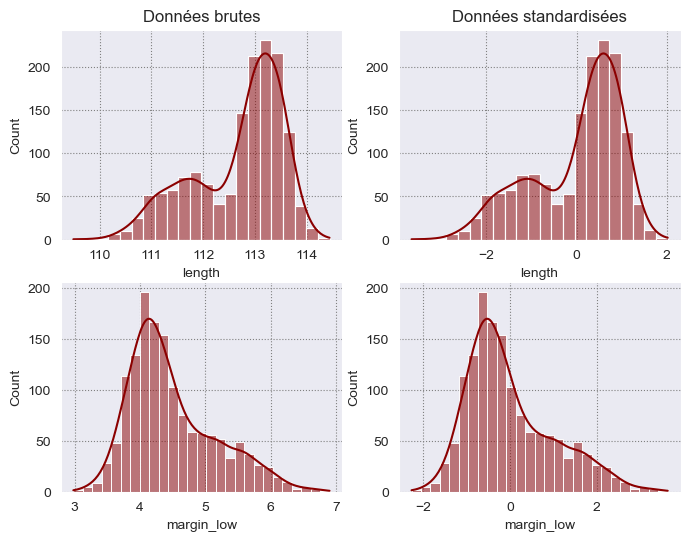

In [22]:
# Vérification que la distribution est resté identique avant/après standardisation, vérification su deux variables
fig, ax = plt.subplots(2,2, figsize=(8,6))

sns.histplot(df_billets['length'], kde = True, fill = True, ax=ax[0,0], color = 'DarkRed')
sns.histplot(df_scaled['length'], kde = True, fill = True, ax=ax[0,1], color = 'DarkRed')
sns.histplot(df_billets['margin_low'], kde = True, fill = True, ax=ax[1,0], color = 'DarkRed')
sns.histplot(df_scaled['margin_low'], kde = True, fill = True, ax=ax[1,1], color = 'DarkRed')


ax[0,0].title.set_text('Données brutes')
ax[0,1].title.set_text('Données standardisées')

plt.show()

In [23]:
# Pas de modification de la distribution des données après standardisation

In [24]:
# On va séparer notre dataset en deux, un ou l'on à toute les valeurs, le second ou l'on aura nos valeurs manquantes

In [25]:
# On fait un df avec les valeurs manquantes sur margin_low
df_scaled_nan = df_scaled.loc[df_scaled['margin_low'].isna()].copy()
df_scaled_nan.info()
display(df_scaled_nan.sample(3))

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 72 to 1438
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    37 non-null     int64  
 1   diagonal      37 non-null     float64
 2   height_left   37 non-null     float64
 3   height_right  37 non-null     float64
 4   margin_low    0 non-null      float64
 5   margin_up     37 non-null     float64
 6   length        37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.3 KB


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
284           1 -0.125994    -0.666529     -0.492466         NaN   0.338863   
710           1  0.234551    -0.198867     -0.185263         NaN  -0.351578   
197           1 -1.666506    -1.234404     -0.369585         NaN   2.021814   

       length  
284  0.700909  
710 -0.032667  
197  0.677984

In [26]:
# df avec sans les valeurs manquantes
df_scaled_not_nan = df_scaled.loc[~df_scaled['margin_low'].isna()].copy()
df_scaled_not_nan.info()
display(df_scaled_not_nan.sample(3))

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   int64  
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 91.4 KB


is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
971            1 -1.273184    -1.501639      0.429141   -0.943310  -0.912562   
145            1 -1.010969    -1.468234     -0.277424   -0.777544  -0.135816   
1341           0 -0.060441     0.602838      0.552022   -0.310385   1.374525   

        length  
971   0.402894  
145   0.414356  
1341 -0.514076

## *4 Traitement des valeurs manquantes*

### *4.1. Analyse de margin_low (ok)*

In [27]:
# Nous avons donc 37 valeurs manquantes dans margin low
# Avant de décider de la façon dont les traiter, regardons leur utilitée pour la suite du projet, à savoir créer un modèle de détection de faux billets

C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


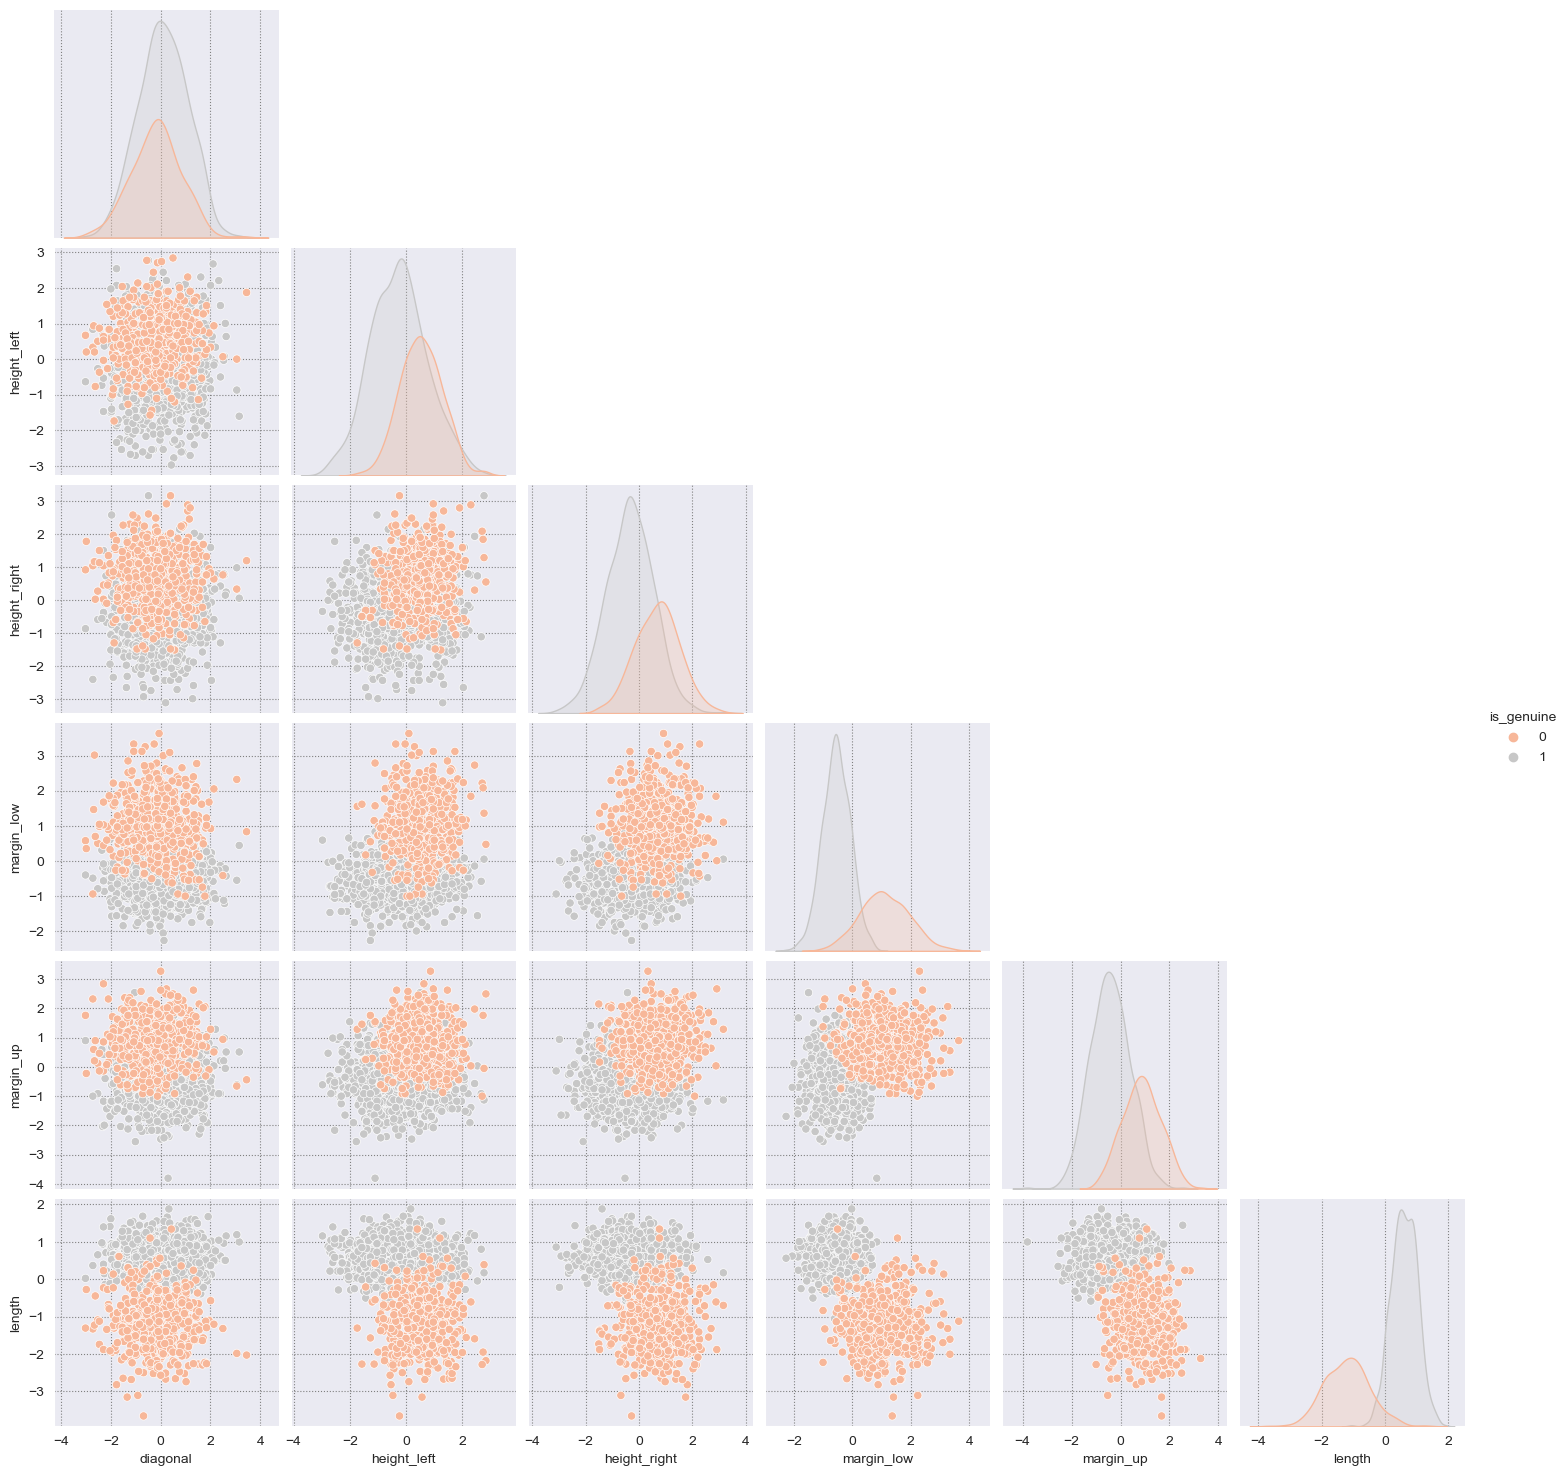

In [28]:
# On fait un pairplot afin d'avoir une peu plus d'informations sur la différence entre les billets, on fait ce pairplot sur un df ou l'on a écarté les valeurs manquantes
# On sépare les vrais des faux billets
sns.pairplot(df_scaled_not_nan,
             hue = 'is_genuine',
             palette = 'RdGy', corner = True)

<Axes: xlabel='margin_low', ylabel='Count'>

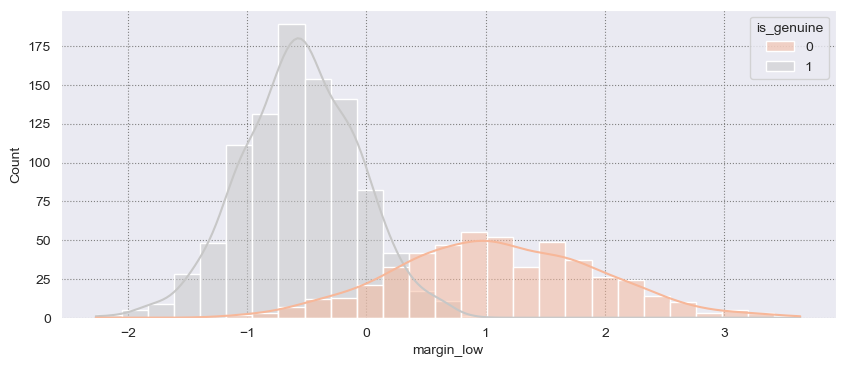

In [29]:
# On regarde plus précisement margin_low en fonction du type de billet
plt.figure(figsize=(10,4))
sns.histplot(data = df_scaled_not_nan, x = 'margin_low', fill = True, hue = 'is_genuine', palette = 'RdGy', kde = True)

<Axes: xlabel='is_genuine', ylabel='margin_low'>

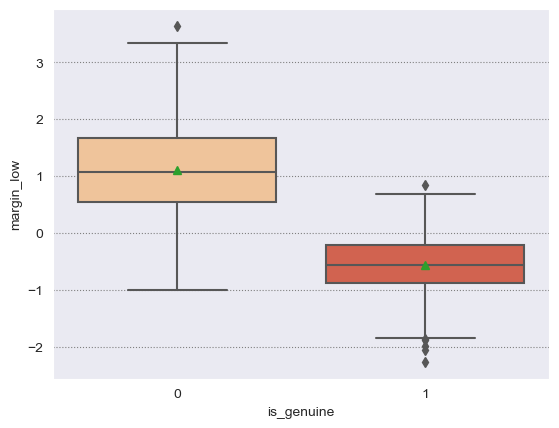

In [30]:
# Boxplot sur margin_low
sns.boxplot(data = df_scaled_not_nan, x = 'is_genuine', y = 'margin_low', showmeans = True, palette = 'OrRd')

#### *4.1.1. Conclusions (ok)*

In [31]:
# En regardant la répartition de margin_low entre les vrais et faux billets on remarque une forte démarcation, cela se remarque également avec un boxplot
# Cela signifie donc que margin_low pourrait être une donnée utile afin de procéder à la détection des faux bien avec du ML
# Le pairplot nous donne également quelques informations supplémentaires quant à la différence entre le type de billet, comme par exemple la longueur

# Traitement de ces valeurs :

# A savoir que les billets avec margin_low manquant représentent 2.46% du dataset

# Nous pouvons envisager plusieurs solutions :
    # Les billets étant de forme rectangulaire, utilisation de pythagore
    # Imputation par la moyenne ou la médiane
    # Utilisation d'un modèle de ML : régression linéaire multiple
    # Supprimer les lignes contenant des valeurs manquantes

### *4.2. Régression linéaire multiple (ok)*

In [32]:
# Recherche de variables qui peuvent expliquer margin_low en vue d'une régression linéaire multiples

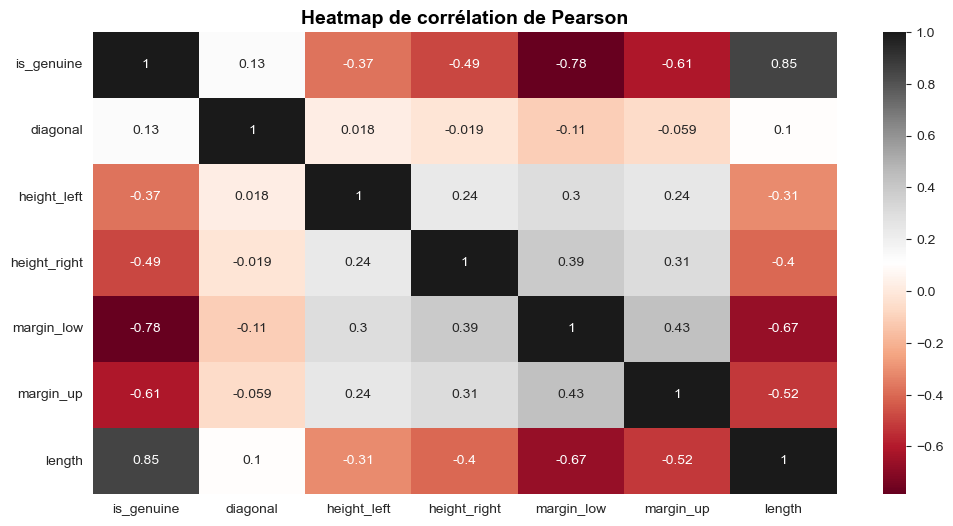

In [33]:
# On fait une heatmap sur notre df complet afin d'avoir un premier visu des corrélation avec margin_low
fct_corr_heatmap(df_scaled_not_nan)

In [34]:
# On remarque que margin_low dépend fortement de margin_up en positif et de is_genuine en négatif, la longueur pourrait aussi être utilisée
# Ces trois variables pourraient être utilisés pour prédire margin_low
# Pour confirmer cela, nous alons faire une backward selection de margin_low en fonction des autres variables


In [35]:
# Recherche de relation linéaire entre une variable et margin_low
# sns.scatterplot(data = df_scaled_not_nan, x = 'margin_up', y = 'margin_low')

In [36]:
# Cette partie va nous permettre de trouver les variables explicatives de margin_low les plus pertinentes
# Cependant nous pourrions le faire directement avec toutes les variables, mais dans le cas de très grands jeux de données elle est couteuse en ressources matérielles et en temps
# Basé sur la fonction smf.ols intégré dans une fonction perso pour automatiser

# Explication backward selection :

# On commence la procédure en intégrant toutes les variables puis on élimine une à une celles qui ont une p-value > 0,05 (fonction avec une boucle et un test)
# H0 : pas de lien (p-value > 0,05), n'aide pas pour la régression, on la retire
# H1 : lien (p-value < 0,05), aide pour la régression, on la conserve

In [37]:
# On prend toutes les colonnes de notre df (elles sont toutes en numériques pour ne pas poser de soucis)
# columns = df_scaled_not_nan.columns.to_list()

# margin_low est la variable que l'on cherche à prédire on fonction des autres variables
# Ce modèle sert juste à définir les variables exploitables, on ne s'en servira pas pour faire de prédictions
reg_back = fct_back_select_linear(df_scaled_not_nan, 'margin_low', summary = False)

Recherche de variables explicatives pertinentes pour : margin_low

_______________________________
margin_low ~ is_genuine + margin_up + height_right + height_left + diagonal + length + 1
remove length (p-value : 0.868 )

_______________________________
margin_low ~ is_genuine + margin_up + height_right + height_left + diagonal + 1
remove diagonal (p-value : 0.719 )

_______________________________
margin_low ~ is_genuine + margin_up + height_right + height_left + 1
remove height_right (p-value : 0.496 )

_______________________________
margin_low ~ is_genuine + margin_up + height_left + 1
remove height_left (p-value : 0.454 )

_______________________________
margin_low ~ is_genuine + margin_up + 1

+============================================================================+
|                        Le modèle final !  (summary)                        |
+============================================================================+

                            OLS Regression Results   

In [38]:
# Maintenant que nous avons nos variables explicatives, nous pouvons réaliser une régression linéaire multifactorielle sur celles ci
# Suite à cela nous allons vérifier différentes infos sur ce modèle prédictif pour en évaluer la précision

# Les variables à utiliser trouvées par backward selection sont : margin_up et is_genuine, pour prédire nos valeurs de margin_low manquantes

In [39]:
# On définit nos valeurs X et y pour entrainer notre modèle

# X contiendra nos variables explicatives de margin_low (définie précédement) - is_genuine et margin_up
X_rlm = df_scaled_not_nan.drop(['margin_low', 'diagonal', 'height_left', 'height_right','length'], axis = 1).copy()

# Attention ! Statsmodels (sm et non smf comme utilisé dans la recherche),
# décide par défaut qu’il n’y a pas de constante, il faut ajouter donc une colonne dans les données pour la constante (source : stat4decision)
X_rlm = sm.add_constant(X_rlm, has_constant = 'add')

# y contiendra les valeurs de la variable que nous cherchons à expliquer sous forme de np.array
y_rlm = df_scaled_not_nan["margin_low"].values.reshape(len(df_scaled_not_nan),1).copy()

In [40]:
# # On vérifie nos deux variables
# # exog (variables explicatives)
# display(X_rlm.head())
# # endog  (variables attendues pour l'entrainement), attention, on perd les indexs ici
# display(y_rlm)

In [41]:
# On split notre jeu de donnée avec train_test_split
# La partie test contiendra 20% de df_scaled_not_nan
# Pour la reproductibilité on défini random_state = 0
# Pour ce projet on ne se servira que de l'échantillon train, on pourrait se servir de test pour faire des comparaisons
# 20% des données seront prisent pour des test : test_size = 0.2
X_train_rlm, X_test_rlm, y_train_rlm, y_test_rlm = train_test_split(X_rlm, y_rlm, test_size = 0.2, random_state = 0)

In [42]:
# Visudes données d'entrainement
display(X_train_rlm.head())
display(y_train_rlm)

const  is_genuine  margin_up
862    1.0           1  -1.171478
513    1.0           1  -1.300935
61     1.0           1  -0.653647
585    1.0           1   0.986152
596    1.0           1  -1.171478

array([[-1.57623523],
       [-0.47615128],
       [-0.74740486],
       ...,
       [ 0.17184337],
       [ 0.26226123],
       [ 0.68421124]])

In [43]:
# Pour la régression linéaire multiple on utilisera statsmodel
# Création du modèle de régression linéaire multiple

# Pour cela on utilise sm.OLS (Moindres carrés ordinaires)
# On spécifie à notre model les données endog (la variable dépendante) et exog (les variables explicatives), cela lui servira de base pour les prédictions
model_OLS = sm.OLS(y_train_rlm, X_train_rlm)

# On fit le modèle sur le jeu de données passé en paramètres juste avant afin de pouvoir s'en servir (si l'on ne l'entraine pas avant cela ne fonctionne pas)
# On nele fit qu'une seule fois avant de faire toute la partie évaluation
# Notre model de régression sera stocker dans cette variable afin de pouvoir l'appeller plus tard
model_reg_line = model_OLS.fit()

# On demande une prédiction de y par rapport à X (X et y sont connus pour nous permettre d'évaluer la qualité du modèle) pour faire quelques test
y_pred_rlm = model_reg_line.predict(X_train_rlm)

# Un premier rapport sur notre modèle entrainé
print(model_reg_line.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          2.89e-244
Time:                        15:39:00   Log-Likelihood:                -1086.0
No. Observations:                1170   AIC:                             2178.
Df Residuals:                    1167   BIC:                             2193.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1375      0.037     30.671      0.0

In [44]:
# Nous avons à présent un modèle qui a été entrainé sur nos données (X_train_rlm et y_train_rlm), à présent, évaluons ce modèle

### *4.3. Evaluation du modèle (ok)*

In [45]:
# Pour évaluer ce modèle nous allons vérifier plusieurs hypothèses :

    # Erreur quadratique et coefficient de détermination du modèle
    
    # La normalité des erreurs résiduelles (QQ-plot, Shapiro)
    
    # L'homoscédasticité, la variance des erreurs résiduelles doit être constante (test de Levène, ...)
    
    # VIF (Variance Inflation Factor) : Il ne devrait pas y avoir d'influence entre les variables prédictives (indépendantes) utilisées par notre modèle pour prédire les valeurs manquantes

#### *4.3.1. MSE, RMSE et R² (ok)*

In [46]:
# Informations :

# Ici nous allons évaluer le modèle de régression à l'aide de différents scores (scores pour régression linéaire)

# MSE (0 <--) : Somme des écarts entre y prédit et y connu (résidus) au carré / nb individus (variance des données par rapport au modèle, donc variance du modèle)
# RMSE (0 <--) : Racine carré MSE
# R2 (--> 1) : Coefficient de détermination (% expliqué par le modèle), variance des données rapport au modèle (résidus) / la variance des données de base

In [47]:
# Première évaluation du training set

# Avec l'erreur quadratique moyenne : MSE (Mean Square Error, l'erreur quadratique moyenne) - Moyenne de la somme des écarts à la moyenne (prédi) au carré
# Avec racine de l'erreur quadratique : RMSE (Root Mean Square Error, racine carrée de l'erreur quadratique moyenne) - Racine carré de MSE - Vers  0 meilleur modèle
# Avec coefficient de détermination R² - Vers 1 meilleur modèle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
# On fait une prédiction de y avec X_train
# model_reg_line.fittedvalues # (On pourrais prendre les fitted values)
y_train_predict = model_reg_line.predict(X_train_rlm)

# On compare entre nos prédictions et les données réelles de y (sur les données train)
# rmse, passer les valeur en log pour plus de précision ?
mse = round(mean_squared_error(y_train_rlm, y_train_predict, squared = True), 3)
rmse = round((mean_squared_error(y_train_rlm, y_train_predict, squared = False)), 3) # squared = True, retourne le MSE donc on fait la racine carré
r2 = round(r2_score(y_train_rlm, y_train_predict), 3)

print("La performance du modèle sur la base d'apprentissage")
print("----------------------------------------------------")
print("")
print("L'erreur quadratique moyenne du modèle est (MSE - Mean Square Error) :", mse)
# print("La racine de l'erreur quadratique moyenne est (RMSE - Root Mean Square Error) :", rmse)
print('Le score R2 est (Coeff de détermination) :', r2*100, '%')


La performance du modèle sur la base d'apprentissage
----------------------------------------------------

L'erreur quadratique moyenne du modèle est (MSE - Mean Square Error) : 0.375
Le score R2 est (Coeff de détermination) : 61.8 %


In [48]:
# Variance des prédiction / variance des données réelles (R²)
y_pred_rlm.var()/y_train_rlm.var()

0.6180351170923114

In [49]:
# MSE (0 <--) : Somme des écarts entre y connu et droite de régression du modèle au carré / nb individus (variance des données par rapport au modèle)
# RMSE (0 <--) : Racine carré MSE
# MAE (0 <--) : Mean absolute error regression loss
# MAPE (0 <--) : Mean absolute percentage error (MAPE) regression loss. Note here that the output is not a percentage in the range [0, 100], and a value of 100 does not mean 100% but 1e2
# R2 (--> 1) : Coefficient de détermination (% expliqué par le modèle), variance des données rapport au modèle / la variance des données de base

# Différents scores pour régression linéaire fait avec le train test
# Source OCR : MSE, RMSE, MAE, MAPE, R2
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# print('MSE', mean_squared_error(y_train_rlm, y_train_predict, squared = True))
# print('RMSE', mean_squared_error(y_train_rlm, y_train_predict, squared = False))
# print('MEA', mean_absolute_error(y_train_rlm, y_train_predict))
# print('MAPE', mean_absolute_percentage_error(y_train_rlm, y_train_predict))
# print('R²', r2_score(y_train_rlm, y_train_predict))

In [50]:
# Conclusions :

# MSE (0 <--) : On obtient 0.375 sur le train set, ce qui montre que notre modèle est asser précis (se rapprochant de 0)
# R2 (--> 1) : Notre modèle est capable d'expliquer 61.8% des données, ce score pourrait être perfectible mais dans les délais imposé on le conservera tel quel

# Si temps disponible, exploration de pistes pour améliorer le modèle

#### *4.3.2. Vérification de la normalité des résidus (ok)*

In [51]:
# Informations :

# A présent on analyse la répartition des résidus (du modèle, pas après une prédiction) afin de vérifier si ils suivent une distribution normale
# Pour valider ce point, les résidus doivent suivre une distribution normale
# On vérifie cela de deux façon, par un qqplot et par un test de shapiro

# Note : Une valeur résiduelle est la différence entre les données observées et la valeur prédite
# Les valeurs résiduelles ne doivent pas présenter de schéma identifiable entre elles

# Dans ce cas, elles doivent suivre une distribution normale

In [52]:
# On récupère les résidus afin de les analyser
# Prend les données que nous avons donné à notre model, à savoir X_train et y_train, les résidus vont être la différence en ce que le modèle a prédit par rapport au réel y_train
# model_reg_line est basé sur X_train et y_train
residus = model_reg_line.resid
residus[:5]

862   -1.054566
513    0.039474
61    -0.201556
585   -0.049639
596   -0.120248
dtype: float64

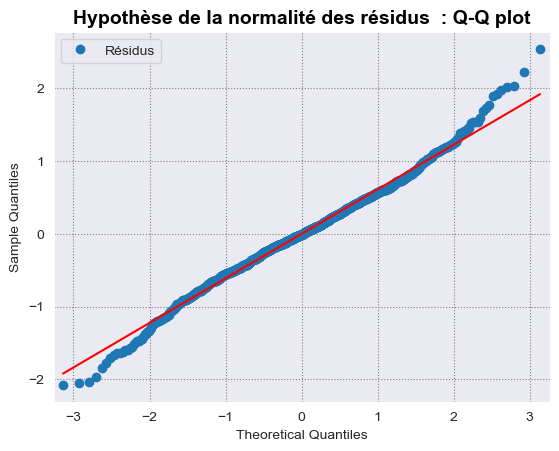

In [53]:
# On fait d'abord un qqplot afin de visualiser la répartition
sm.qqplot(residus, line = 's', fit = False, label = "Résidus")
plt.title("Hypothèse de la normalité des résidus  : Q-Q plot", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.legend()
plt.show()

In [54]:
# A première vue on pourrait dire que les résidus suivent une loi normale, nous allons vérifier cela avec un test de Shapiro et un histogramme

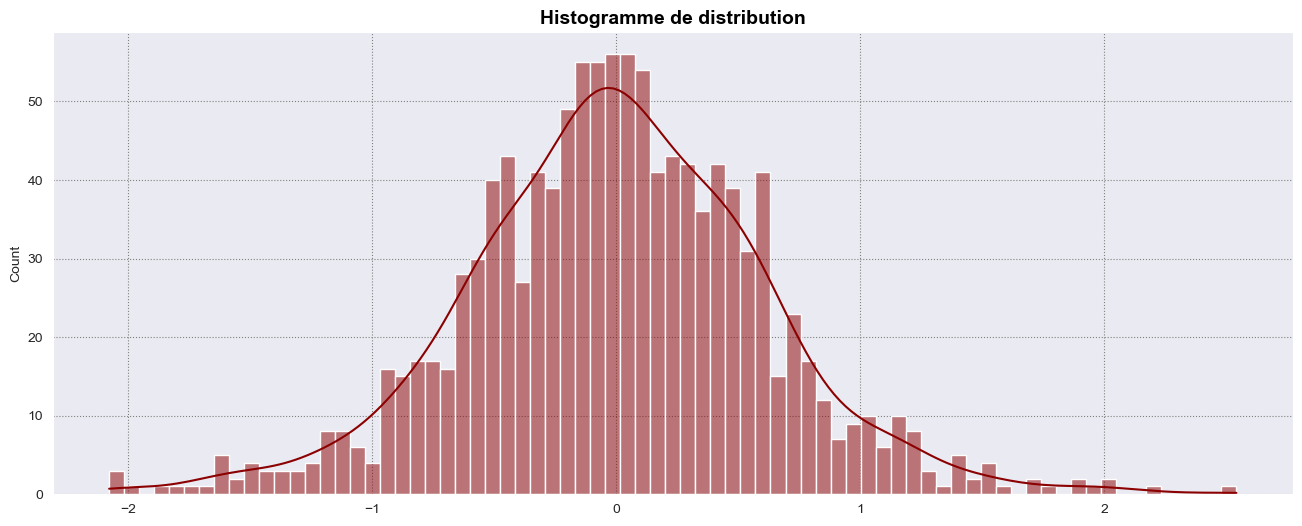

Résultats du test Shapiro :
-----------------------------------------------------------------------------------------------
Statistique : 0.992
p-value : 7.610959528392414e-06
Nombre d'individus : 1170 (Attention, si nombre d'individus élevés)
-----------------------------------------------------------------------------------------------

Note :
-----------------------------------------------------------------------------------------------
H0 : la distribution suit une loi normale
H1 : la distribution ne suit pas une loi normale

Si p-value > 0.05, hypothèse H0 acceptée, distribution normale
Si p-value < 0.05, hypothèse H0 rejetée, distribution n'est pas normale

p-value < 0.05 : H0  Rejetée, la distribution ne suit pas une loi normale


(0.9922047853469849, 7.610959528392414e-06)

In [55]:
# On fait un test de shapiro pour vérifier que les résidus suivent une distribution normale ou non
# Appel de la fonction fct_shapiro pour évaluer la distribution des résidus
fct_shapiro(residus, graph = True, bins = 75, color = 'DarkRed')

In [56]:
# Conclusions :

# Attention : Echantillons de plus de 30 individus, le test de shapiro peut être faussé par la taille de l'échantillon
# Visuellement la distribution est "presque" normale
# Toutefois au visu des résultats statistiques nous devons rejeter cette hypothèse

# H0 : rejetée, la distribution des résidus ne suit pas une loi normale (bien que de visu elle le soit presque, comme l'échantillon est > 30, la distribution n'est pas absurde))

#### *4.3.3. Vérification l'homoscédasticité des résidus (ok)*

In [57]:
# Informations :

# On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus

##### *4.3.3.1. Test de Breusch Pagan (ok)*

In [58]:
# Test de Breusch Pagan - Source : TP OCR

# The tests the hypothesis that the residual variance does not depend on the variables in x in the form

# On récupère les variables exog (explicatives) de l'entrainement du model (correspondent à X_train)
variables = model_reg_line.model.exog
variables

array([[ 1.        ,  1.        , -1.17147759],
       [ 1.        ,  1.        , -1.30093534],
       [ 1.        ,  1.        , -0.65364658],
       ...,
       [ 1.        ,  0.        , -0.0495104 ],
       [ 1.        ,  1.        , -1.6893086 ],
       [ 1.        ,  1.        , -0.69679916]])

In [59]:
# On récupère les résidus du modèle
residus = model_reg_line.resid
residus

862    -1.054566
513     0.039474
61     -0.201556
585    -0.049639
596    -0.120248
          ...   
783     0.550961
858     0.601165
1248   -0.968005
572     0.759751
700     1.228045
Length: 1170, dtype: float64

In [60]:
# On regarde que la variance des résidus ne dépend pas des variables d'entrées du model

# Note : Pour ce test, il faut qu'il y ai une constante dans nos variables exogs (Assumes x contains constant (for counting dof and calculation of R^2))
# f-statistic of the hypothesis that the error variance does not depend on x
lm, pval, fvalue, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residus, variables)
print('Test de Breusch Pagan :')
print('-----------------------')
print('p-value :', pval)
# Voir notes ci-dessus
print('Statistique (f_value, données stat que la variance des résidus ne dépend pas de x) :', round(fvalue, 4))


Test de Breusch Pagan :
-----------------------
p-value : 1.6223530361976033e-27
Statistique (f_value, données stat que la variance des résidus ne dépend pas de x) : 68.7804


In [61]:
# Conclusions :

# H0 : La variance des résidus ne dépend pas des variables explicatives
# H1 : La variance des résidus dépend des variables explicatives


# H0 : rejetée (p-value < 0.05), il y a hétéroscédasticité des résidus
# Note : Toutefois on peux remarquer que la variance des résidus ne dépend PAS de x à 68.78 %...

##### *4.3.3.2. Test de Levène (ok)*

In [62]:
# On vérifie à présent que la variance des résidus est constante à tous les niveaux

# Note : Une valeur résiduelle est la différence entre les données observées et la valeur prédite
# Les valeurs résiduelles ne doivent pas présenter de schéma identifiable entre elles

# Dans ce cas, la variance des résidus et celle des variables prédites doivent être les mêmes

In [63]:
# Test de Levene sur les résidus et les prédictions

# Le test de Levene vérifie si plusieurs groupes ont la même variance dans la population, on vérifie donc la variance des résidus sur plusieurs niveaux

# H0 : Les variances entre les deux groupes sont égales
# H1 : Au moins un des groupe à une variance différente

# Note : Une valeur résiduelle est la différence entre les données observées et la valeur prédite. Les valeurs résiduelles ne doivent pas présenter de schéma identifiable entre elles
from scipy.stats import levene

In [64]:
# On récupère les résidus
residus = model_reg_line.resid
residus

862    -1.054566
513     0.039474
61     -0.201556
585    -0.049639
596    -0.120248
          ...   
783     0.550961
858     0.601165
1248   -0.968005
572     0.759751
700     1.228045
Length: 1170, dtype: float64

In [65]:
# On récupère les données prédites pendant le train
predicted = model_reg_line.fittedvalues
predicted

862    -0.521670
513    -0.515625
61     -0.545849
585    -0.622417
596    -0.521670
          ...   
783    -0.559954
858    -0.549879
1248    1.139848
572    -0.497490
700    -0.543834
Length: 1170, dtype: float64

In [66]:
# Valeurs attendues dans le train set
y_train_rlm

array([[-1.57623523],
       [-0.47615128],
       [-0.74740486],
       ...,
       [ 0.17184337],
       [ 0.26226123],
       [ 0.68421124]])

In [67]:
# On divise en groupes en fonction de la variable prédite

# Quantile-based discretization function.
# Discretize variable into equal-sized buckets based on rank or based
# on sample quantiles. For example 1000 values for 10 quantiles would
# produce a Categorical object indicating quantile membership for each data point

# Regroupe les valeurs par quantille, exemple q=5, défini 5 quantilles et classe les valeurs dans chacun de ces groupes
# Retourn un 'index' avec le groupe auquel il appartient
group = pd.qcut(predicted, q = 4, labels = False)
# Groupes fait avec qcut
# group[:5]

# Valeurs regroupées selon les groupes faits avec qcut
# group_resid = [residus[group == i] for i in np.unique(group)]
# group_resid

# On effectue le test de Levene sur les résidus groupés en fonction des prédictions
# Avec ce test on vérifie si tout les groupes ont la même variance
t_stat,  pvalue = levene(*[residus[group == i] for i in np.unique(group)], center = 'mean')
# t_stat,  pvalue = levene(*group_resid, center = 'mean')

# On affiche les résultats
print('Test de Levene :')
print('----------------')
print('Statistique de test :', round(t_stat, 4))
print('Valeur p-value :', pvalue)

Test de Levene :
----------------
Statistique de test : 35.9793
Valeur p-value : 3.071765978417169e-22


In [68]:
# Conclusions :

# H0 : Les variances entre les différents groupes sont égales
# H1 : Au moins un des groupe à une variance différente

# HO : rejetée (p-value < 0.05), au moins un des groupe présente une variance significative comparé aux autres

#### *X.X.X. Valeurs atypiques et influentes - Source : TP OCR (ne pas prendre en compte)*

##### *X.X.X. Leviers*

##### *X.X.X. Résidus Studentisés*

##### *X.X.X. Cooks distance*

##### *X.X.X. Résultats*

#### *4.3.4. Vérification du VIF (ok)*

In [69]:
# On vérifie ici  la colinéaritée entre les diférentes variables qui ont servit à entrainer le model

In [70]:
# On appelle la fonction pour le calcul du VIF que l'on applique sur les données qui ont servis à fit notre modèle
# Il y a donc une très faible corrélation entre nos deux variables explicatives utilisées pour entrainer notre modèle
vif = fct_vif(data = X_train_rlm)


Variable vérifiée : const
Ok pour traitement des données après vérifcation...

Variable vérifiée : is_genuine
Ok pour traitement des données après vérifcation...

Variable vérifiée : margin_up
Ok pour traitement des données après vérifcation...

+---------------------------------+
| VIF - Variance Inflation Factor |
+---------------------------------+


feature       VIF
0       const  4.283612
1  is_genuine  1.617936
2   margin_up  1.617936

In [71]:
# Conclusions :

# Il n'y à pas de dolinéarité entre nos variables permettant d'expliquer la variable prédite (VIF < 2, selon documentation < 5 pas de risques)
# On ne tient pas compte de 'const' car c'est nous qui l'avons ajouter pour faire la régression

### *4.4. Sauvegarde du modèle final de régression linéaire multi (ok)*

In [72]:
# Conclusions après évaluation du modèle (régression linéaire multiple) :

    # MSE, R² (pour info) :
        # MSE (0 <--) : On obtient 0.375 sur le train set, ce qui montre que notre modèle est asser précis, on perd en précision sur le test set car nous avons moins de données en entrée
        # R2 (--> 1) : Notre modèle est capable d'expliquer 61.8% des données, ce score pourrait être perfectible mais dans les délais imposé on le conservera tel quel
     
    # Normalité des résidus : Sur les graphiques, les résidus semble suivrent une loi normale, toutefois H0 rejetée après test de Shapiro
    # (attention toutefois à la taille de l'échantillon > 30, donc distribution normale pas absurde) - NOK (discutable)
    
    # Homoscédasticité des résidus : Le test de Levène rejète l'homoscédasticité des résidus (la variance n'est pas constante à tous les niveaux), le test de Breush Pagan également - NOK
        
    # VIF : Absence de collinéarité entre les variables explicatives - OK
    
    # Notre modèle rempli une des trois conditions de test (attention toutefois à la normalité des résidus)
    # Toutefois, comme il ne remplit pas les autres conditions, son utilisation pourrait être remise en cause
    # Il est également envisageable de se pencher sur l'amélioration du modèle, mais cela demanderais des ressources supplémentaires non disponibles faute de temps
    # Nous décidons tout de même de se servir de ce modèle car cela ne concerne que 37 individus sur 1500, soit 2.46% du dataset
    # Nous aurions également pu décider d'écarter ces billets pour la suite du projet

In [73]:
# On fait une RàZ du modèle avant de l'enregistrer
# On le fit juste comme on l'avait fait avant de passer à son évaluation, juste pour être sur que nous ne l'avons pas biaisé entre temps
# Normalement ce n'est pas nécessaire mais c'est une précaution

In [74]:
# On définit nos valeurs X et y pour entrainer notre modèle (on reprend le df_scaled sans les NaN)

# X contiendra nos variables explicatives de margin_low (définie précédement) - is_genuine et margin_up
X_rlm = df_scaled_not_nan.drop(['margin_low', 'diagonal', 'height_left', 'height_right','length'], axis = 1).copy()

# Attention ! Statsmodels (sm et non smf comme utilisé dans la recherche),
# décide par défaut qu’il n’y a pas de constante, il faut ajouter donc une colonne dans les données pour la constante (source : stat4decision)
X_rlm = sm.add_constant(X_rlm, has_constant = 'add')

# y contiendra les valeurs de la variable que nous cherchons à expliquer sous forme de np.array
y_rlm = df_scaled_not_nan["margin_low"].values.reshape(len(df_scaled_not_nan),1).copy()

In [75]:
# On vérifie nos deux variables
# exog (variables explicatives)
display(X_rlm)
# endog  (variables attendues pour l'entrainement)
display(y_rlm)

const  is_genuine  margin_up
0       1.0           1  -1.128325
1       1.0           1  -0.696799
2       1.0           1  -0.912562
3       1.0           1  -0.610494
4       1.0           1   1.417677
...     ...         ...        ...
1495    1.0           0  -0.265273
1496    1.0           0   0.942999
1497    1.0           0   0.899846
1498    1.0           0   1.331372
1499    1.0           0   0.942999

[1463 rows x 3 columns]

array([[ 0.05128623],
       [-1.07893701],
       [-0.12954949],
       ...,
       [ 1.5431809 ],
       [ 1.03081304],
       [ 0.2170523 ]])

In [76]:
# On split notre jeu de donnée avec train_test_split
# 20% des données seront prisent pour des test : test_size = 0.2
X_train_rlm, X_test_rlm, y_train_rlm, y_test_rlm = train_test_split(X_rlm, y_rlm, test_size = 0.2, random_state = 0)

In [77]:
# On spécifie à notre model les données endog (la variable dépendante) et exog (les variables explicatives), cela lui servira de base pour les prédictions
# Note : A ce stade on pourrait prendre l'intégralité des données en écartant les NaN sans passer par un split auparavant mais je reste sur les même
# caractéristiques que le modèle que j'ai évalué auparavant
model_OLS = sm.OLS(y_train_rlm, X_train_rlm)

# On fit le modèle sur le jeu de données passé en paramètres juste avant afin de pouvoir s'en servir (si l'on ne l'entraine pas avant cela ne fonctionne pas)
# Notre model de régression sera stocker dans cette variable afin de pouvoir l'appeller plus tard
model_reg_line = model_OLS.fit()

In [78]:
# Infos sur le modèle final
print(model_reg_line.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     942.0
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          2.89e-244
Time:                        15:39:01   Log-Likelihood:                -1086.0
No. Observations:                1170   AIC:                             2178.
Df Residuals:                    1167   BIC:                             2193.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1375      0.037     30.671      0.0

In [79]:
# On stock notre modèle avec joblib pour le réutiliser plus tard

# On instancie notre fonction dans une variable
model_01 = model_reg_line

# On regarde que le modèle est bien en mémoire
print(model_01)

# On stocke dans un fichier joblib
# (nom de la fonction, nom du fichier)
joblib.dump(model_01, 'model_01.joblib')

['model_01.joblib']

### *4.5. Prédiction des valeurs manquantes et df final (ok)*

In [80]:
# df avec données manquantes
df_scaled_nan.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1 -0.060441    -0.466103     -1.444792         NaN   0.425168   
99            1 -0.093217     0.135176      0.797784         NaN  -0.049510   
151           1  0.365659    -0.766742      1.412188         NaN  -0.567341   
197           1 -1.666506    -1.234404     -0.369585         NaN   2.021814   
241           1 -0.420986     0.369007      0.429141         NaN  -0.567341   

       length  
72   0.127803  
99   0.460204  
151  0.288272  
197  0.677984  
241 -0.365069

In [81]:
# On regarde quelles données il faudra donner à notre modèle pour prédire margin_low
# model_01 : Notre modèle de régression linéaire
model_01.params

const         1.137536
is_genuine   -1.713906
margin_up    -0.046694
dtype: float64

In [82]:
# Données explicatives pour prédiction (exog) - 'is_genuine' et 'margin_up'
# On garde ce qui correspond à notre modèle, on retire les autres
X = df_scaled_nan.drop(['margin_low', 'diagonal', 'height_left', 'height_right','length'], axis = 1).copy()

# Ajout d'une constante  pour la régression linéaire avec statsmodel
X = sm.add_constant(X)

# Données à prédire par la prédiction (endog) - 'margin_low', ici on créé un array de la bonne taille pour y stocker nos valeurs prédites
y = df_scaled_nan["margin_low"].values.reshape(len(df_scaled_nan),1).copy()

# Cela nous permet de garder les index afin d'ajouter les données prédites dans le df de base : df_billets

In [83]:
X.head()

const  is_genuine  margin_up
72     1.0           1   0.425168
99     1.0           1  -0.049510
151    1.0           1  -0.567341
197    1.0           1   2.021814
241    1.0           1  -0.567341

In [84]:
# On charge notre modèle stockée
# On peux chager cette fonction dans n'importe quel notebook si le fichier joblib est dans le notebook
model_test = joblib.load('model_01.joblib')

In [85]:
# On fait une prédiction de nos données manquantes sur les données leurs correpsondants avec notre modèle chargé et entrainé
margin_low_pred = model_test.predict(X)
# Visu de nos prédictions
margin_low_pred[:5]

72    -0.596223
99    -0.574059
151   -0.549879
197   -0.670776
241   -0.549879
dtype: float64

In [86]:
# On transfert les valeurs prédites dans df_scaled_nan
# On reprend le df avec les valeurs manquantes et on assigne les valeurs prédites
df_scaled_nan_pred = df_scaled_nan.assign(margin_low = margin_low_pred)
df_scaled_nan_pred.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72            1 -0.060441    -0.466103     -1.444792   -0.596223   0.425168   
99            1 -0.093217     0.135176      0.797784   -0.574059  -0.049510   
151           1  0.365659    -0.766742      1.412188   -0.549879  -0.567341   
197           1 -1.666506    -1.234404     -0.369585   -0.670776   2.021814   
241           1 -0.420986     0.369007      0.429141   -0.549879  -0.567341   

       length  
72   0.127803  
99   0.460204  
151  0.288272  
197  0.677984  
241 -0.365069

In [87]:
# On réunit toutes nos données et on reset l'index
df_final_clean = pd.concat([df_scaled_not_nan, df_scaled_nan_pred])
# On reset l'index pour avoir un df_final propre
df_final_clean.reset_index(drop = True, inplace = True)

# Notre df_final avec l'imputation des données manquantes grace à la régression linéaire multiple
df_final_clean

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1 -0.486540     2.774123      3.163240    0.051286  -1.128325   
1              1 -1.633729    -2.236535     -0.799668   -1.078937  -0.696799   
2              1  2.397823     1.504756     -1.291191   -0.129549  -0.912562   
3              1 -1.961498    -0.399294      0.060498   -1.304982  -0.610494   
4              1 -0.748754     0.836669     -1.414072   -0.672057   1.417677   
...          ...       ...          ...           ...         ...        ...   
1495           0  0.693427     1.538161     -0.492466    1.182162  -0.955715   
1496           0  0.398435     0.402412      0.767063    1.087459   1.072457   
1497           0 -0.781531     1.437948      0.613462    1.045145   1.978661   
1498           0  2.299493     1.003691      1.504349    1.055220   1.762898   
1499           0 -0.191548     0.836669      1.135706    1.119698   0.382015   

        length  
0     0.173651  
1     0.471666  
2     0.551901  
3     0.953075  
4    -0.158750  
...        ...  
1495 -1.683213  
1496 -0.445303  
1497 -2.714803  
1498 -1.385197  
1499 -1.362273  

[1500 rows x 7 columns]

In [88]:
# On vérifie la colonne que l'on vient de modifier afin de voir si il y a une différence notable

In [89]:
# df complet avec données prédites
df_final_clean['margin_low'].describe().round(4)

count    1500.0000
mean       -0.0048
std         0.9943
min        -2.2694
25%        -0.6871
50%        -0.2652
75%         0.5787
max         3.6379
Name: margin_low, dtype: float64

In [90]:
# df sans les données manquantes
df_scaled_not_nan['margin_low'].describe().round(4)

count    1463.0000
mean        0.0000
std         1.0003
min        -2.2694
25%        -0.7097
50%        -0.2652
75%         0.5787
max         3.6379
Name: margin_low, dtype: float64

In [91]:
# Différences entre avant et après
df_scaled_not_nan['margin_low'].describe().round(4) - df_final_clean['margin_low'].describe().round(4)

count   -37.0000
mean      0.0048
std       0.0060
min       0.0000
25%      -0.0226
50%       0.0000
75%       0.0000
max       0.0000
Name: margin_low, dtype: float64

In [92]:
# On ne note pas de différences significatives avant et après imputation

# Nous avons à présent un dataset nettoyé pour être utilisé pour créer un modèle de ML pour la détection de faux billets selon leurs caractéristiques dimensionnelles

---
# Partie 2 - Détection des faux billets

## 1. Exploration et recherche d'information (ok)
---

In [93]:
# Maintenant que notre data set est nettoyé, nous allons chercher pour infos nous permettant de savoir si un billet est vrai ou faux

C:\Users\david\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


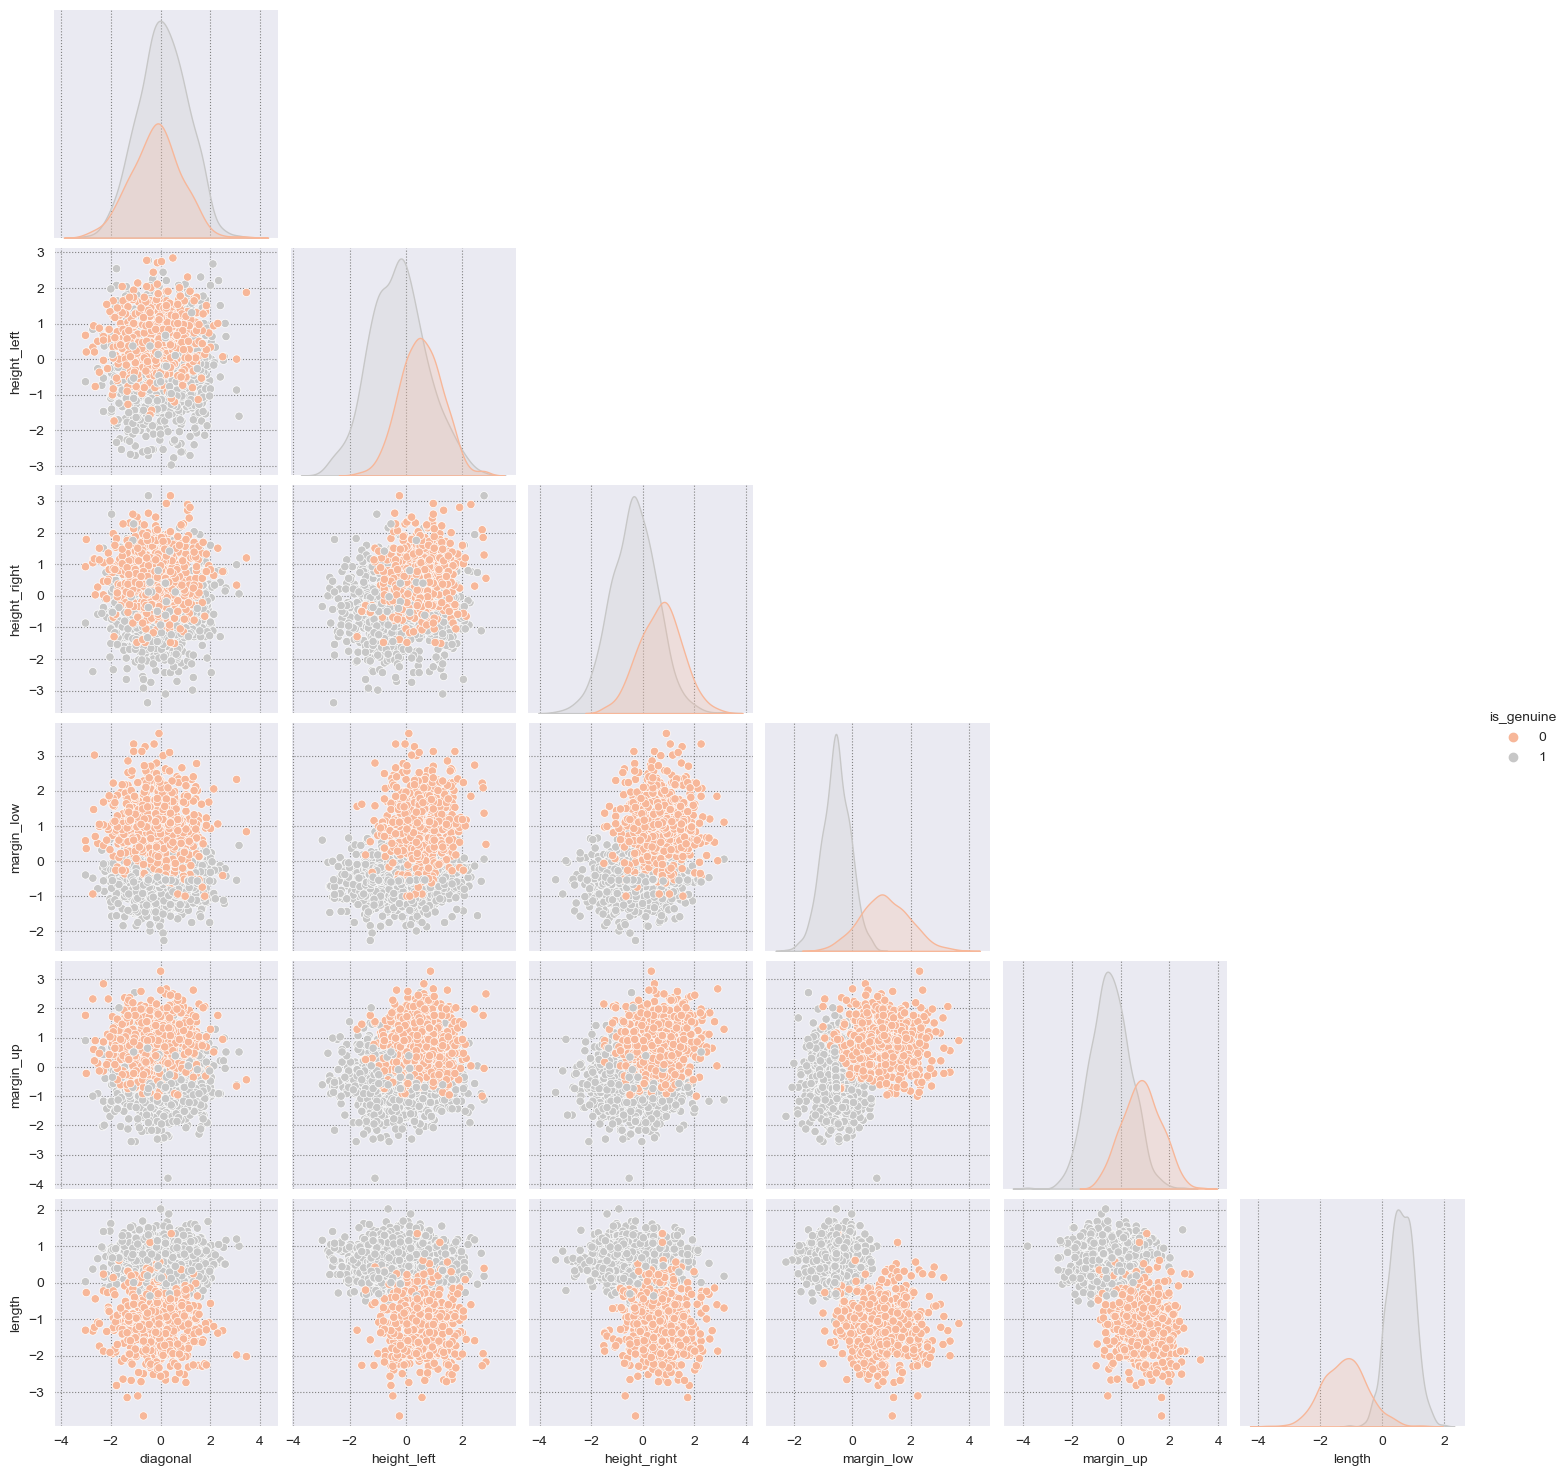

In [94]:
# On fait un pairplot afin d'avoir une peu plus d'informations sur la différence entre les billets
sns.pairplot(df_final_clean,
             hue = 'is_genuine',
             palette = 'RdGy', corner = True)

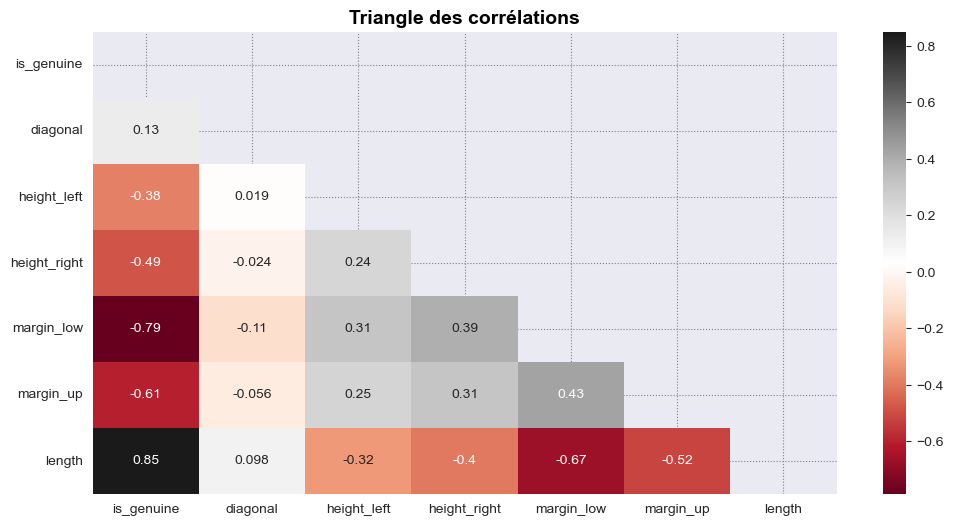

In [95]:
# Une première visualisation de ce qui défini l'état d'un billet avec un triangle de corrélations
fct_corr_matrix(df_final_clean)

In [96]:
# On remarque déjà un certains nombre de choses :

# Le type de billet est fortement corrélé lenght et margin_low, cela se voit sur le pairplot et sur la heatmap
# La démarcation au niveau de la distribution est bien démarquée
# Nous allons faire une ACP afin d'avoir un peu plus d'informations

### *1.1. Analyse Composantes Principales (ok)*

In [97]:
# On fait une ACP pour avoir plus d'infos afin de connaitre ce qui différencie les billets entre eux
# On se focalisera principalement sur ce qui défini le type d'un billet pour le cercle de corrélations

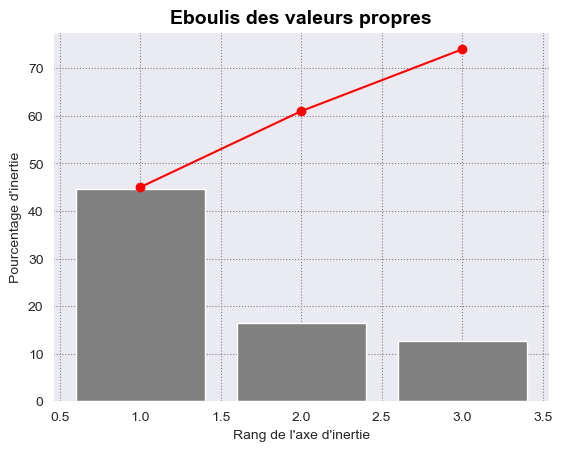

3 composantes expliquent 74.0 % de la variance
+---------------------------------------------------------------------------------------------+


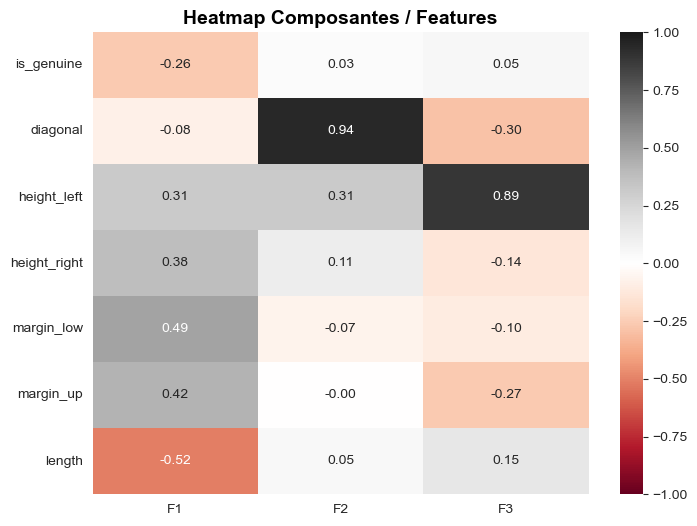

In [98]:
acp = fct_pca(df_final_clean, n_comp = 3)

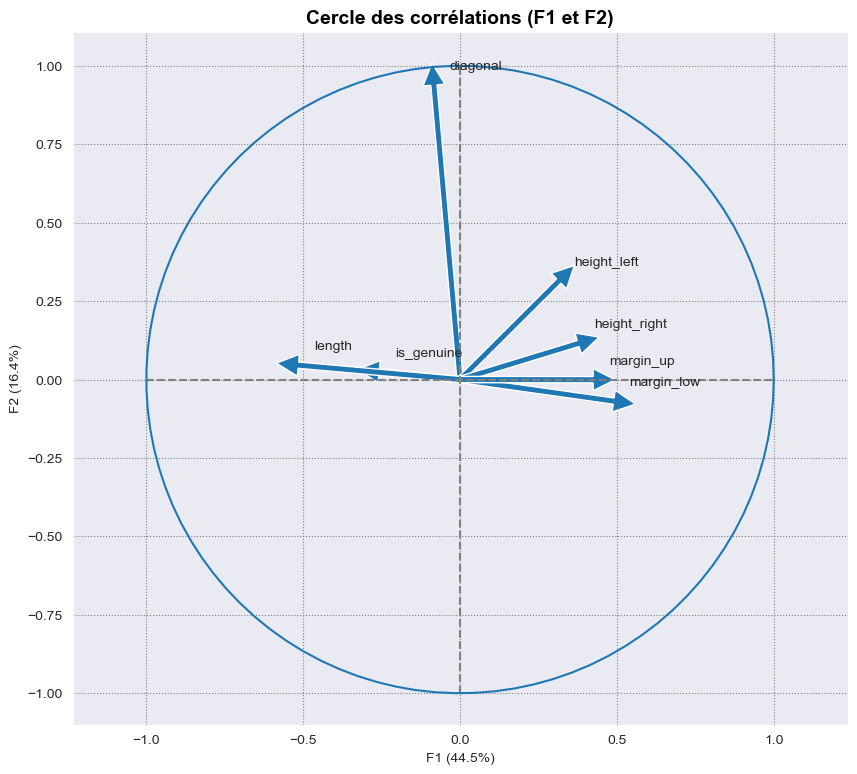

In [99]:
# On trace le cercle de corrélation pour confirmer ce que l'on a vu auparavant
fct_correlation_graph(acp[0], (0,1), features = df_final_clean.columns)

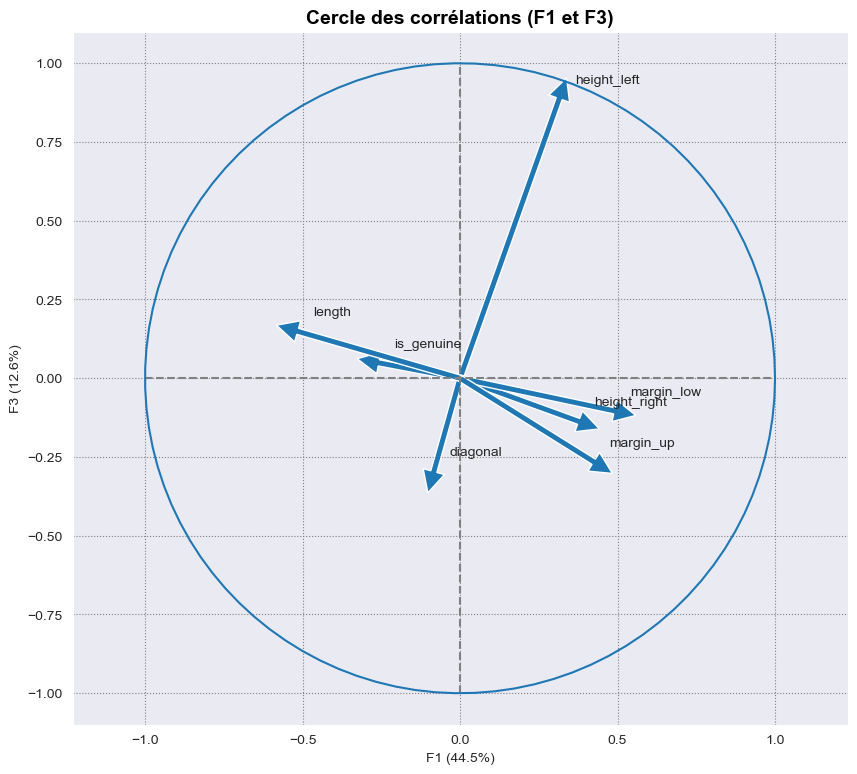

In [100]:
# On trace le cercle de corrélation pour confirmer ce que l'on a vu auparavant
fct_correlation_graph(acp[0], (0,2), features = df_final_clean.columns)

In [101]:
# is_genuine est fortement corrélé à lenght sur F1 et anti-corrél à margin_up, low et height_right également sur F1
# F2 et F3 ne nous apportent pas vraiment d'infos sur le type des billets

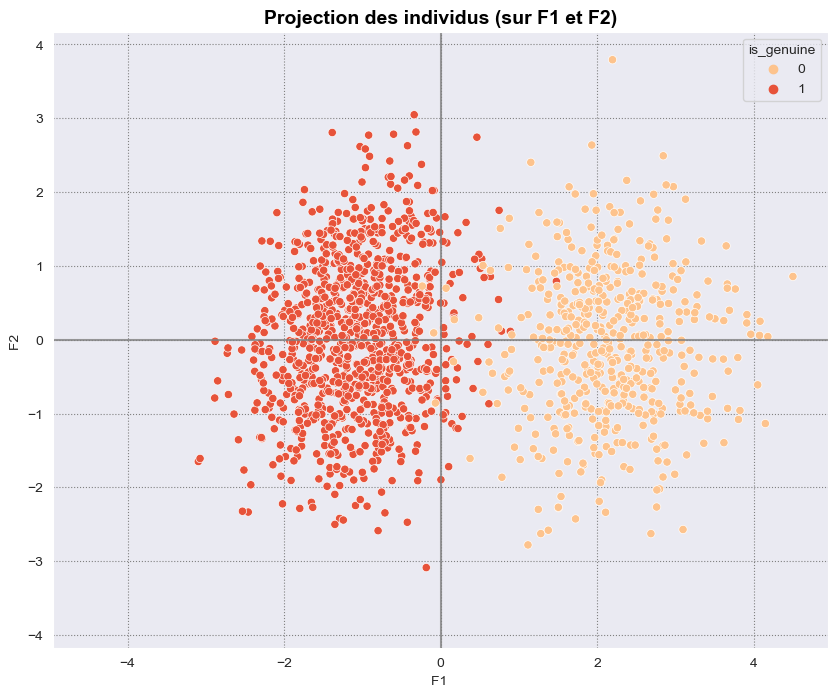

In [102]:
# Cluster : 0 = Faux, 1 = Vrai
fct_display_factorial_planes(acp[2], (0,1), clusters = df_final_clean['is_genuine'])

In [103]:
# On remarque un certain nombre de choses :

# is_genuine est fortement corrélé à lenght sur F1 et anti-corrélé à margin_up, low et height_right également sur F1
# F2 et F3 ne nous apportent pas vraiment d'infos sur le type des billets

# Cela nous donne déjà des pistes sur les caractéristiques qui nous permettent de dire si un billet est vrai ou faux

### *1.2. Conclusions (ok)*

In [104]:
# Pairplot :

# Le type de billet est fortement corrélé lenght et margin_low, cela se voit sur le pairplot et sur la heatmap
# La démarcation au niveau de la distribution est bien démarquée
# Nous allons faire une ACP afin d'avoir un peu plus d'informations

In [105]:
# Analyse Composantes Principales :

# is_genuine est fortement corrélé à lenght sur F1 et anti-corrél à margin_up, low et height_right également sur F1
# F2 et F3 ne nous apportent pas vraiment d'infos sur le type des billets

# Cela nous donne déjà des pistes sur les caractéristiques qui nous permettent de dire si un billet est vrai ou faux

In [106]:
# Maintenant que nous connaissons plus d'infos, nous allons mettre en concurrence 3 méthodes afin de prédire le type d'un billet :

# Régression logistique (renvoi un score)
# KMeans, méthode de clustering (pas vraiment adaptée)
# KNN, classification selon les plus proches voisins

## 2. Régression logistique (ok)
---

In [107]:
# La régression logistique est une méthode de classification (supervisée) qui nous retournera dans ce cas une valeur binaire en fonction des variables explicatives

In [108]:
# Utilisation de sklearn pour la régression logistique
# Librairie nous permettant de faire une Régression Logistique
from sklearn.linear_model import LogisticRegression

# Librairies nécessaire pour réaliser une matrice de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [109]:
# On reprend notre df nettoyé précédement
df_final_clean.sample(3)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
1002           0  1.447295    -0.098654     -0.308144    2.778892  -0.222121   
724            1  1.119526     1.838800      0.767063   -0.189828   0.770389   
177            1 -0.519316     0.469220     -0.553906   -0.687126  -0.998867   

        length  
1002 -0.651622  
724   0.345583  
177   0.414356

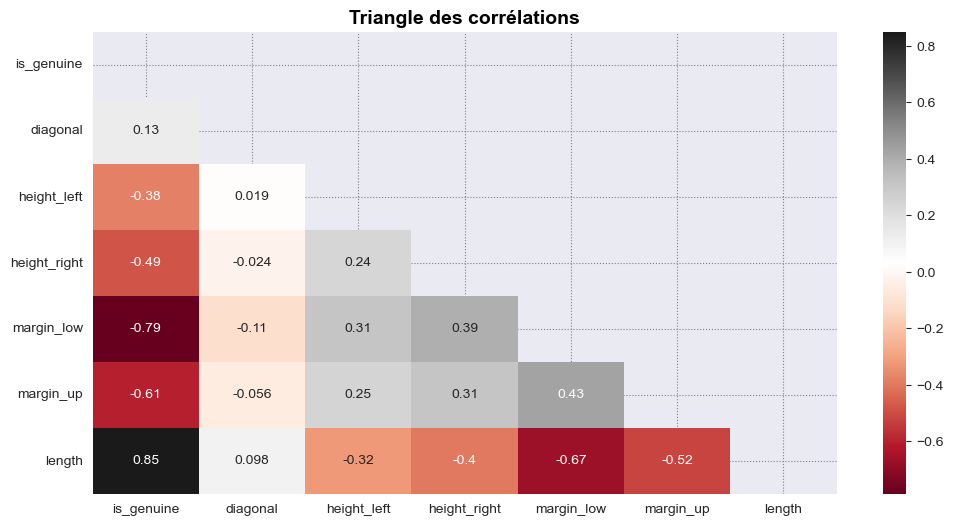

In [110]:
# Une première visualisation de ce qui défini l'état d'un billet avec un triangle de corrélations
fct_corr_matrix(df_final_clean)

In [111]:
# is_genuine est fortement corrélé à : lenght, margin_low (variable que nous avons du prédire), margin_up, height_right et height_left
# La variable diagonal ne permet pas d'aider à déterminer si un billet est vrai ou faux

In [112]:
# %run DsFx_fct.ipynb
%run GESSER_David_2_DsFx_fct_102023.ipynb
# Comme pour la régression linéaire nous utilisons une fonction déjà définie (dans le même esprit qu'une backward selection pour régression linéaire)
# afin de trouver les variables explicatives de is_genuine
columns = df_final_clean.columns.to_list()

fct_back_select_logit(df_final_clean[columns], 'is_genuine', summary = False)

Recherche de variables explicatives pertinentes pour : is_genuine

_______________________________
is_genuine ~ margin_up + margin_low + height_right + height_left + diagonal + length + 1
Optimization terminated successfully.
         Current function value: 0.026342
         Iterations 11
remove diagonal (p-value : 0.82 )

_______________________________
is_genuine ~ margin_up + margin_low + height_right + height_left + length + 1
Optimization terminated successfully.
         Current function value: 0.026359
         Iterations 11
remove height_left (p-value : 0.25 )

_______________________________
is_genuine ~ margin_up + margin_low + height_right + length + 1
Optimization terminated successfully.
         Current function value: 0.026806
         Iterations 11

+============================================================================+
|                        Le modèle final !  (summary)                        |
+================================================================

In [113]:
# On a un pseudo R² de 0.96, ce qui est déjà encourageant quant à la qualité de notre modèle

In [114]:
# On définit nos valeurs X et y pour entrainer notre modèle

# X contiendra nos variables explicatives de is_genuine (définie précédement)
X_rlog = df_final_clean.drop(['diagonal', 'height_left', 'is_genuine'], axis = 1).copy()

# Contrairement à une régression linéaire, il n'y a pas besoin de spécifier de constante
# X_reg = sm.add_constant(X_reg, has_constant = 'add')

# y contiendra les valeurs de la variable que nous cherchons à expliquer sous forme de np.array - ici 'is_genuine'
y_rlog = df_final_clean["is_genuine"].copy()

# On split notre jeu de donnée avec train_test_split
# Pour la reproductibilité on défini random_state = 0
# 80% des données seront prisent pour train : train_size = 0.8, c'est sur ce modèle que nous ferons des prédictions futures
X_train_rlog, X_test_rlog, y_train_rlog, y_test_rlog = train_test_split(X_rlog, y_rlog, test_size = 0.2, random_state = 0)

In [115]:
# Utilisation de DummyClassifier pour avoir un premier score de référence - Source : OCR

# DummyClassifier makes predictions that ignore the input features
# This classifier serves as a simple baseline to compare against other more complex classifiers
# The specific behavior of the baseline is selected with the strategy parameter

from sklearn.dummy import DummyClassifier

# Création etfit DummyClassifier
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train_rlog, y_train_rlog)

# Score de comparaison
dummy_clf.score(X_train_rlog, y_train_rlog)

0.6683333333333333

In [116]:
# On vérifie nos deux variables
# exog (variables explicatives)
display(X_rlog.head())
# endog  (variables attendues pour l'entrainement)
display(y_rlog[:])

height_right  margin_low  margin_up    length
0      3.163240    0.051286  -1.128325  0.173651
1     -0.799668   -1.078937  -0.696799  0.471666
2     -1.291191   -0.129549  -0.912562  0.551901
3      0.060498   -1.304982  -0.610494  0.953075
4     -1.414072   -0.672057   1.417677 -0.158750

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

In [117]:
# Création du modèle de régression logistique

# Pour cela on utilise sklearn (lib chargée plus haut)
model_logit = LogisticRegression()

# On fit le modèle 
# On spécifie à notre model les données endog/target (la variable dépendante) et exog/training (les variables explicatives), cela lui servira de base pour les prédictions
# Notre model de régression sera stocker dans cette variable afin de pouvoir l'appeller plus tard
model_reg_logit = model_logit.fit(X_train_rlog, y_train_rlog)

# On demande une prédiction de y par rapport à X
# On fait cela sur notre échantillon de test pour voir l'efficacité du model
y_pred_rlog = model_reg_logit.predict(X_test_rlog)

# Un premier rapport sur la précision du modèle entre X_train et y_train
print('Score avec X_train et y_train :', round(model_reg_logit.score(X_train_rlog, y_train_rlog)*100, 3), '%')
print('Score avec X_test et y_test :', round(model_reg_logit.score(X_test_rlog, y_test_rlog)*100, 3), '%')

Score avec X_train et y_train : 99.333 %
Score avec X_test et y_test : 98.667 %


In [118]:
# Comparé a DummyClassifier nous obtenons un score très nettement supérieur

### *2.1. Evaluation du modèle*

In [119]:
# Nous évaluerons notre modèle sur le jeu de données de test, ce sont des données sur lesquelles le modèle n'a pas été fit

# Pour pouvoir compaé les modèles entre eux, nous regarderons principalement : F1 Score, AUC ROC,
# éventuellement la précision et le recall si deux modèles sont égaux ou très proches

#### *2.1.1. Xxx (ok)*

#### *2.1.2. Scores (ok)*

In [120]:
# L’équation peut être simplifiée et s’exprimer directement à partir des composantes de la matrice de confusion :
# Cette dernière formule montre que le F1-score compare les prédictions positives correctes (TP) aux erreurs (FN+FP) faites par le modèle
# On regarde ce qui a été prédit avec X_test (y_pred = prédiction sur X_test) par rapport à ce qui est vrai, donc y_test

# On utilisera des metrics de sklearn :

# Accuracy : Le ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid.
# Accuracy = TP+TN/total

# Precision : (précision) - Le ratio de vrais positifs sur le total des prédictions positives. Precision = TP/TP+FP

# Recall : (rappel) - Le ratio de positif prédit correctement parmi tous les positifs réels. Recall = TP/TP+FN

# score F1 = Moyenne harmonique entre rappel et précision - TP / (TP + 1/2 (FN + FP)) - Si l'image ne s'affiche pas

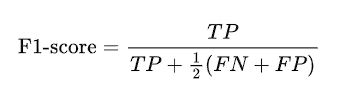

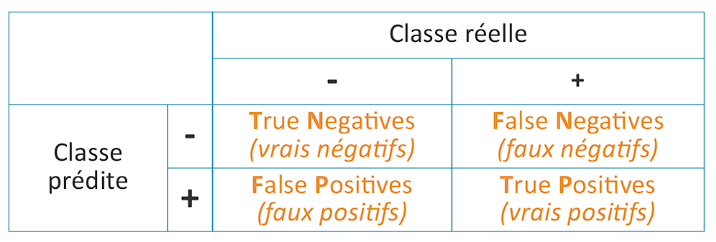

In [121]:
# On demande une prédiction de y par rapport à X
# On fait cela sur notre échantillon de test pour voir l'efficacité du model
# y_pred = model_reg_logit.predict(X_test)

In [122]:
# Calculs de différents scores
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

# print('Accurancy (TP+TN/Total) :', round(accuracy_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
print('Précision (TP/TP+FP) :', round(precision_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
print('Recall (TP/TP+FN) :', round(recall_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
print('')
print('Le F1 score de notre model sur les données Test est de :', round(f1_score(y_test_rlog, y_pred_rlog)*100, 3), '%')

Précision (TP/TP+FP) : 98.5 %
Recall (TP/TP+FN) : 99.495 %

Le F1 score de notre model sur les données Test est de : 98.995 %


#### *2.1.3. Matrice de confusion (ok)*

In [123]:
# Explication de la matrice de confusion : Source OCR

# On peut évaluer la qualité d'un modèle par validation croisée, et étudier un certain nombre de critères,
# parmi lesquels la sensibilité et la spécificité, calculées à partir de la matrice de confusion

In [124]:
# Librairies nécessaire pour réaliser une matrice de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

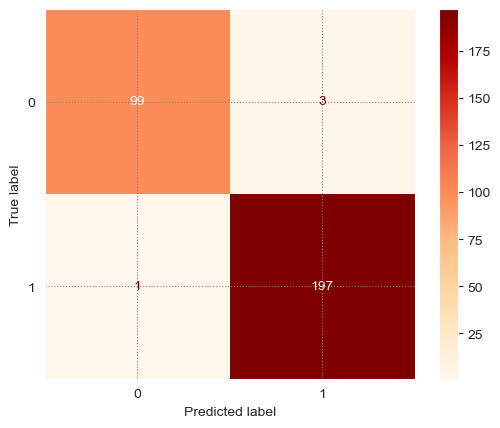

In [125]:
# Matrice de confusion entre vrai et faux positifs

# Fait sur le jeu de test (données qui n'ont pas servie à fait le modèle)
# y_pred = model_reg_logit.predict(X_test)
# confusion_matrix(vrai, prediction)
c_matrix = confusion_matrix(y_test_rlog, y_pred_rlog)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot(cmap = 'OrRd')
plt.show()

In [126]:
# Conclusions :

# On observe 1 faux positif et 3 faux négatifs, ce qui est plus que correct pour ce modèle

#### *2.1.4. Courbe ROC (ok)*

In [127]:
# Explication courbe R.O.C. :

# Le terme courbe ROC signifie courbe caractéristique de fonctionnement du récepteur. Cette courbe est essentiellement une représentation graphique des performances
# de tout modèle de classification à tous les seuils de classification.

# Il y a deux paramètres de cette courbe :

# True Positive Rate (TPR) - Signifie réel, c’est-à-dire une vraie sensibilité
# Taux de faux positifs (FPR) - Signifie pseudo, c’est-à-dire fausse sensibilité
# Les deux paramètres sont appelés caractéristiques de fonctionnement et sont utilisés comme facteurs pour définir la courbe ROC.

# En Python, l’efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC).
# Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.

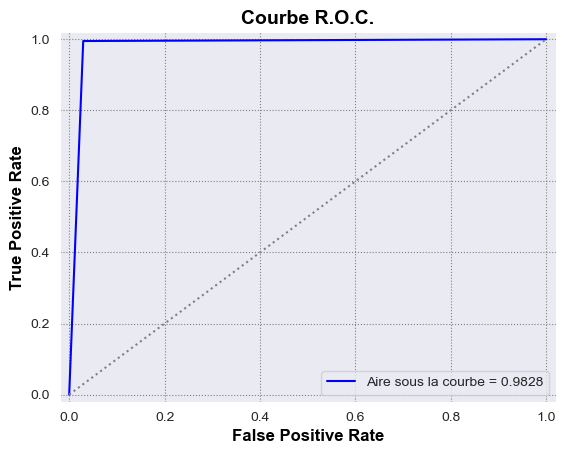

In [128]:
# Courbe R.O.C.avec données justes et prédites
fpr, tpr, _ = roc_curve(y_test_rlog, y_pred_rlog)
# Calcul de l'aire sous la courbe
roc_auc_rlog = roc_auc_score(y_test_rlog, y_pred_rlog)

# Graphique
plt.title('Courbe R.O.C.', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.plot(fpr, tpr, color = 'blue', linewidth = 1.5, label = 'Aire sous la courbe = %0.4f' % roc_auc_rlog)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.legend(loc = "lower right")
plt.ylabel('True Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('False Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [129]:
# Conclusions :

# On obtient une AUC ROC de 0.9828, ce qui est très bien

### *2.2. Sauvegarde du modèle de régression logistique (ok)*

In [130]:
# Conclusions après évaluation du modèle (régression logistique) :

    # Voir chapitre final "Sélection du modèle"

In [131]:
# On stock notre modèle avec joblib pour le réustiliser plus tard

# On instancie notre fonction dans une variable
model_02 = model_reg_logit

# On regarde que le modèle est bien en mémoire
print(model_02)

# On stocke dans un fichier joblib
# (nom de la fonction, nom du fichier)
joblib.dump(model_02, 'model_02.joblib')

LogisticRegression()


['model_02.joblib']

## 3. KMeans - Avec définition des centroïdes (ok)
---

In [132]:
# KMeans est un algorithme de clustering, donc il n'est pas vraiment adapté pour ce cas. Nous allons tout de même l'utiliser afin de le comparer aux autres modèles

In [133]:
# Ici on calculera d'abord les centroïdes puis nous les passerons en paramètres dans le modèle
# Ce n'est donc plus KMeans qui les définira automatiquement lors du fit
# On comparera tout de même les centroides défini par KMeans et ceux donnés manuellement

In [134]:
df_final_clean.sample(3)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
195            1 -0.191548     1.304330      0.306260   -0.159689  -0.222121   
442            1  1.906171     0.068368     -0.431025   -0.219967  -0.955715   
1480           1  0.365659    -0.967168     -0.492466   -0.563984  -0.265273   

        length  
195   0.219500  
442   1.675189  
1480 -0.307758

In [135]:
# On définit nos valeurs X et y pour entrainer et évaluer notre notre modèle

# X contiendra nos variables explicatives de is_genuine (définie précédement)
X_km = df_final_clean.drop("is_genuine", axis=1).copy()

# y contiendra les valeurs de la variable que nous cherchons à expliquer sous forme de np.array - ici 'is_genuine'
y_km = df_final_clean["is_genuine"].copy()

# On split notre jeu de donnée avec train_test_split (pour kmeans nous n'aurions pas besoin, toutefois pour avoir une même base de comparaison entre les modèles nous le faisons)
# Pour la reproductibilité on défini random_state = 0
# 80% des données seront prisent pour train : train_size = 0.8, c'est sur ce modèle que nous ferons des prédictions futures
X_train_km, X_test_km, y_train_km, y_test_km = train_test_split(X_km, y_km, train_size = 0.8, random_state = 0)

In [136]:
# On passe l'étape pour déterminer le nombre de cluster, ici nous en voulons 2 : Vrai et Faux
# kmeans a déjà été importé on l'instancie donc pour la suite
model_kmeans_test = KMeans(n_clusters = 2, random_state = 1884)

In [137]:
# On fit le modèle avec le jeu d'entrainement pour avoir les centroïdes
model_kmeans_test.fit(X_train_km)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, random_state=1884)

In [138]:
# Message d'avertissement dû a un memory leak sur windows

In [139]:
# Affichage des paramètres complets de model_kmeans_test
model_kmeans_test.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': 1884,
 'tol': 0.0001,
 'verbose': 0}

In [140]:
# Centroïdes de X_train défini par KMeans après un fit sur le jeu d'entrainement
centroides_km = model_kmeans_test.cluster_centers_
centroides_km

array([[ 0.07322885, -0.27877276, -0.35334797, -0.54334552, -0.43825843,
         0.58441034],
       [-0.19304534,  0.57367264,  0.76129359,  1.1165571 ,  0.86107484,
        -1.20610899]])

In [141]:
# On vérifie rapidement le clustering fait par KMeans
# On teste une prédiction sur le set de test
pd.DataFrame(model_kmeans_test.predict(X_test_km)).head()

0
0  0
1  0
2  1
3  0
4  1

In [142]:
# Résultats justes du set de test
pd.DataFrame(y_test_km).head()

is_genuine
471            1
9              1
1499           0
54             1
1411           0

In [143]:
# On remarque que les clusters sont inversés, donc pour prendre les centroides que KMeans à défini pour les passer en paramètre il faudrait les inverser
# Nous allons appliqué une autre manière, à savoir définir nous même les centroïdes et les passer en paramètre dans KMeans

### *Définition des centroides manuellement (ok)*

In [144]:
# Calcul des centroïdes du jeu d'entrainement de façon manuelle
# Méthode : On groupby sur 'is_genuine' puis on calcule la moyenne de chaque variable, on calculera les centroïdes à partir du jeu de train
X_km_test = X_train_km.copy()
X_km_test['is_genuine'] = y_train_km
print('Train set :')
display(X_km_test.head())
print('Centroides calculés :')
display(X_km_test.groupby('is_genuine').mean())
centroides_manu = np.array(X_km_test.groupby('is_genuine').mean())
print('Centroides :')
centroides_manu

Train set :


diagonal  height_left  height_right  margin_low  margin_up    length  \
620  0.791758    -0.332485     -1.321911   -1.033728  -0.696799  1.090621   
655  1.021196     0.870073      0.920664   -0.898101   1.633440  0.941613   
319 -1.764837    -1.869087     -0.308144   -0.204898  -0.437884  0.024644   
140  0.726204     1.437948     -0.369585   -0.265176  -1.344088  1.033310   
629  0.365659    -0.666529     -0.646067   -0.069271  -0.696799  0.494591   

     is_genuine  
620           1  
655           1  
319           1  
140           1  
629           1

Centroides calculés :


diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                               
0          -0.196654     0.542744      0.736729    1.106797   0.854417   
1           0.076348    -0.267676     -0.346717   -0.546781  -0.441435   

              length  
is_genuine            
0          -1.201947  
1           0.591275

Centroides :


array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
        -1.20194742],
       [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
         0.59127539]])

In [145]:
# Passer les centroides calculé manuellement dans le modèle KMeans
model_kmeans = KMeans(n_clusters = 2, init = centroides_manu, n_init = 1, random_state = 1884)
# On fit le modèle sur les données d'entrainement avec des centroïdes déjà définis
model_kmeans.fit(X_train_km)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(init=array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
        -1.20194742],
       [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
         0.59127539]]),
       n_clusters=2, n_init=1, random_state=1884)

In [146]:
# Affichage des paramètres complets
model_kmeans.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
         -1.20194742],
        [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
          0.59127539]]),
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 1,
 'random_state': 1884,
 'tol': 0.0001,
 'verbose': 0}

In [147]:
# Comme précedement on vérifie que nos clusters sont justes
# On teste une prédiction sur le set de test
pd.DataFrame(model_kmeans.predict(X_test_km)).head()

0
0  1
1  1
2  0
3  1
4  0

In [148]:
# Résultats justes du set de test
pd.DataFrame(y_test_km).head()

is_genuine
471            1
9              1
1499           0
54             1
1411           0

In [149]:
# Fait sur le jeu de test, pour être identique à l'évaluation des autres modèles
# Nous aurions pu le faire sur les données complètes car nous n'avons pas entrainé le modèle, nous l'avons défini nous même
df_pred_km = model_kmeans.predict(X_test_km)

In [150]:
# Test : ajout des centroïdes calculés aux données de train pour faire un scatter plot et voir comment sont répartis les billets
df_centro = pd.DataFrame(centroides_manu)
df_centro.columns = X_km_test.drop('is_genuine', axis = 1).columns
# On remet la colonne is_genuine  pour le concat ensuite
df_centro['is_genuine'] = 'centroide'
df_centro_v2 = pd.concat([X_km_test, df_centro])
# Affichage des centroïdes
print('Centroïdes :')
display(df_centro)
# Affichage du df complet
print('df complet :')
display(df_centro_v2.tail())

Centroïdes :


diagonal  height_left  height_right  margin_low  margin_up    length  \
0 -0.196654     0.542744      0.736729    1.106797   0.854417 -1.201947   
1  0.076348    -0.267676     -0.346717   -0.546781  -0.441435  0.591275   

  is_genuine  
0  centroide  
1  centroide

df complet :


diagonal  height_left  height_right  margin_low  margin_up    length  \
1216  1.152303    -0.198867      0.336980    0.171843  -0.049510 -1.729061   
559  -0.420986    -0.766742      0.920664    0.262261  -1.689309  0.655060   
684   0.857311    -0.232272      0.152659    0.684211  -0.696799  0.379969   
0    -0.196654     0.542744      0.736729    1.106797   0.854417 -1.201947   
1     0.076348    -0.267676     -0.346717   -0.546781  -0.441435  0.591275   

     is_genuine  
1216          0  
559           1  
684           1  
0     centroide  
1     centroide

<Axes: xlabel='length', ylabel='margin_low'>

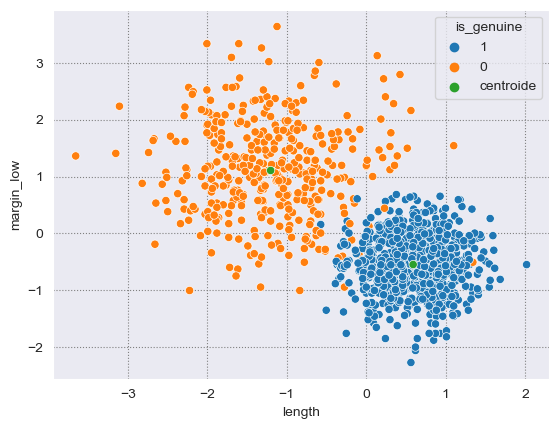

In [151]:
# Visu de deux variables avec les centroides
# On remarque un mélange entre vrai et faux, ce qui laisse penser que kmeans risque de nous retourner de mauvais résultats
# A voir lors de l'évaluation du modèle
sns.scatterplot(data = df_centro_v2, x = 'length', y = 'margin_low', hue = 'is_genuine')

### *3.1. Evaluation du modèle (ok)*

In [152]:
# A noter que KMeans est un algo de clustering, donc l'utiliser pour faire une prédiction est un peu contre nature
# Nous n'aurions pas besoin de faire un split des données, mais pour comparer les modèles sur le même jeu de données nous l'avons fait en amont

In [153]:
# Affichage des paramètres complets
model_kmeans.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
         -1.20194742],
        [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
          0.59127539]]),
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 1,
 'random_state': 1884,
 'tol': 0.0001,
 'verbose': 0}

#### *3.1.1. Scores (ok)*

In [154]:
# L’équation peut être simplifiée et s’exprimer directement à partir des composantes de la matrice de confusion :
# Cette dernière formule montre que le F1-score compare les prédictions positives correctes (TP) aux erreurs (FN+FP) faites par le modèle
# On regarde ce qui a été prédit avec X_test (y_pred = prédiction sur X_test) par rapport à ce qui est vrai, donc y_test

# On utilisera des metrics de sklearn :

# Accuracy : Le ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid.
# Accuracy = TP+TN/total (equivalent au score du modèle obtenu avec .scroe())

# Precision : (précision) - Le ratio de vrais positifs sur le total des prédictions positives. Precision = TP/TP+FP

# Recall : (rappel) - Le ratio de positif prédit correctement parmi tous les positifs. Recall = TP/TP+FN

# score F1 = Moyenne harmonique entre rappel et précision - TP / (TP + 1/2 (FN + FP)) - Si l'image ne s'affiche pas

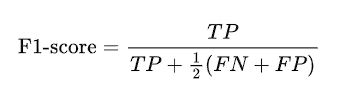

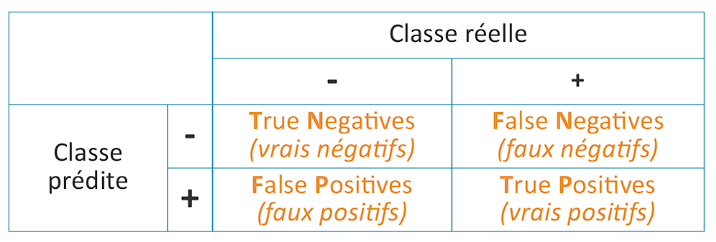

In [155]:
# Calculs de différents scores sur le jeu de test (le faire pour les deux autres jeux pour voir si amélioration ?)
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

# print('Accurancy (TP+TN/Total) :', round(accuracy_score(y_test_km, df_pred_km)*100, 3), '%')
print('Précision (TP/TP+FP) :', round(precision_score(y_test_km, df_pred_km)*100, 3), '%')
print('Recall (TP/TP+FN) :', round(recall_score(y_test_km, df_pred_km)*100, 3), '%')
print('')
print('Le F1 score de notre model sur les données Test est de :', round(f1_score(y_test_km, df_pred_km)*100, 3), '%')

Précision (TP/TP+FP) : 97.98 %
Recall (TP/TP+FN) : 97.98 %

Le F1 score de notre model sur les données Test est de : 97.98 %


#### *3.1.2. Matrice de confusion (ok)*

In [156]:
# On pourrait faire cela sur différentes taille du jeu de données afin de voir si plus on à de données en entrée plus le modèle est pertinent ou non ?

In [157]:
# Affichage des paramètres complets
model_kmeans.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
         -1.20194742],
        [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
          0.59127539]]),
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 1,
 'random_state': 1884,
 'tol': 0.0001,
 'verbose': 0}

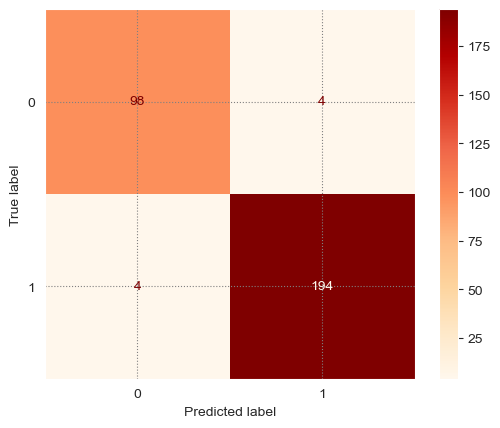

In [158]:
# Matrice de confusion entre vrai et faux positifs

# Fait sur le jeu de test
# Nous garderons celui ci pour être raccord avec les autres modèles
df_pred_km = model_kmeans.predict(X_test_km)
# confusion_matrix(vrai, prediction)
c_matrix = confusion_matrix(y_test_km, df_pred_km)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot(cmap = 'OrRd')
plt.show()

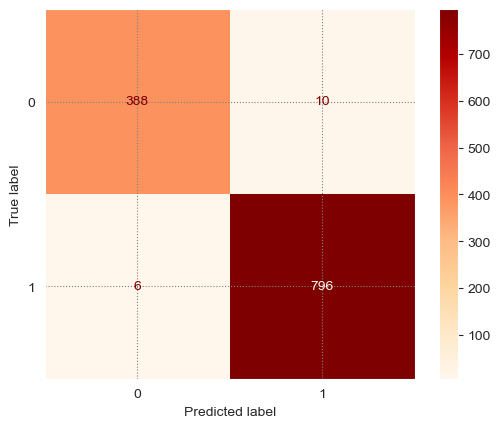

In [159]:
# Matrice de confusion entre vrai et faux positifs

# Fait sur le jeu de train, juste pour information
df_pred_km = model_kmeans.predict(X_train_km)
# confusion_matrix(vrai, prediction)
c_matrix = confusion_matrix(y_train_km, df_pred_km)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot(cmap = 'OrRd')
plt.show()

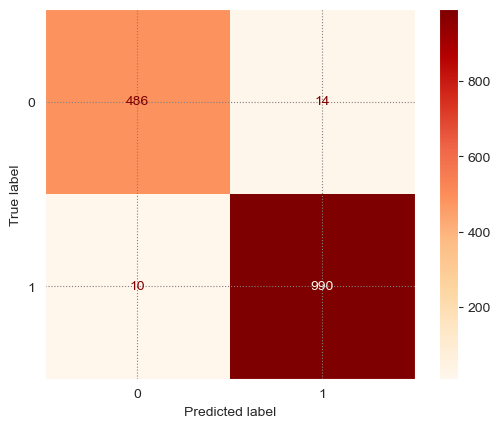

In [160]:
# Matrice de confusion entre vrai et faux positifs

# Fait sur le jeu complet de données, juste pour information
df_pred_km = model_kmeans.predict(X_km)
# confusion_matrix(vrai, prediction)
c_matrix = confusion_matrix(y_km, df_pred_km)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot(cmap = 'OrRd')
plt.show()

In [161]:
# Conclusions :

# Si l'on ne fait pas attention, les résultats peuvent être inversés
# Plus on augmente le jeu de données pour faire des prédictions plus les faux positifs et négatifs augmentent

#### *3.1.3. Courbe ROC (ok)*

In [162]:
# Explication courbe R.O.C. :

# Le terme courbe ROC signifie courbe caractéristique de fonctionnement du récepteur. Cette courbe est essentiellement une représentation graphique des performances
# de tout modèle de classification à tous les seuils de classification.

# Il y a deux paramètres de cette courbe :

# True Positive Rate (TPR) - Signifie réel, c’est-à-dire une vraie sensibilité
# Taux de faux positifs (FPR) - Signifie pseudo, c’est-à-dire fausse sensibilité
# Les deux paramètres sont appelés caractéristiques de fonctionnement et sont utilisés comme facteurs pour définir la courbe ROC.

# En Python, l’efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC).
# Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.

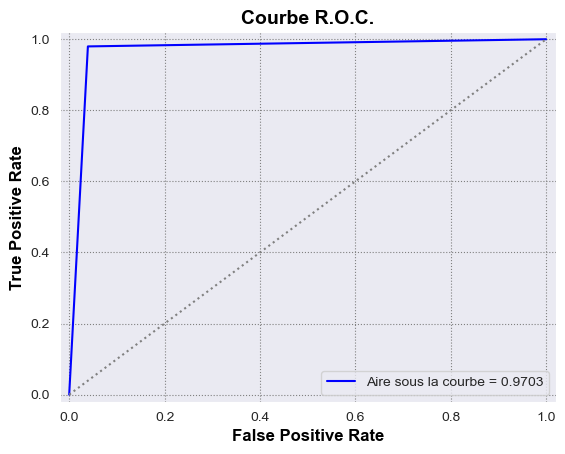

In [163]:
# Fait sur le jeu de test
df_pred_km = model_kmeans.predict(X_test_km)

# Courbe R.O.C.avec données justes et prédites
fpr, tpr, _ = roc_curve(y_test_km, df_pred_km)
# Calcul de l'aire sous la courbe
roc_auc_km = roc_auc_score(y_test_km, df_pred_km)

# Graphique
plt.title('Courbe R.O.C.', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.plot(fpr, tpr, color = 'blue', linewidth = 1.5, label = 'Aire sous la courbe = %0.4f' % roc_auc_km)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.legend(loc = "lower right")
plt.ylabel('True Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('False Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

### *3.2. Sauvegarde du modèle KMeans*

In [164]:
# Conclusions après évaluation du modèle (KMeans) :

    # Attention : KMeans est un modèle pour faire de la classification non supervisé, pas adapté à faire de la prédiction au même titre qu'une régression
    # Il est difficile d'évaluer ce modèle car le seul paramètre sur lequel on agit est le nombre de cluster (qui ici est fixe), nous ne pouvons donc pas utiliser
    # le score de silhouette ou la méthode du coude
    # Cela ce remarque particulièrement en jouant sur le paramètre random_state qui peux faire changer le résultat au total inverse
    # (on le remarque principalement avec la matrice de confusion en jouant sur random_state = 0 ou 1884)

In [165]:
# On paramètre notre model avant de le sauvegarder

In [166]:
# On stock notre modèle avec joblib pour le réustiliser plus tard

# On instancie notre fonction dans une variable
model_03 = model_kmeans

# On regarde que le modèle est bien en mémoire ainsi que les paramètres
display(model_kmeans.get_params(deep=True))

# On stocke dans un fichier joblib
# (nom de la fonction, nom du fichier)
joblib.dump(model_03, 'model_03.joblib')

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': array([[-0.19665386,  0.54274357,  0.73672909,  1.10679744,  0.85441697,
         -1.20194742],
        [ 0.07634767, -0.26767552, -0.34671691, -0.54678102, -0.44143487,
          0.59127539]]),
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 1,
 'random_state': 1884,
 'tol': 0.0001,
 'verbose': 0}

['model_03.joblib']

## 4. KNN (A voir selon le temps restant pour le projet) (ok)
---

In [167]:
# Import de knn, on utilise KNN Classifier pour prédire une catégorie, dans le cas de valeurs, nous aurions utilisé KNN Regressor (pensée à reg lin multi)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [168]:
# On définit nos valeurs X et y pour entrainer et évaluer notre notre modèle

# X contiendra nos variables explicatives de is_genuine (définie précédement)
X_knn = df_final_clean.drop("is_genuine", axis=1).copy()

# y contiendra les valeurs de la variable que nous cherchons à prédire sous forme de np.array - ici 'is_genuine'
y_knn = df_final_clean["is_genuine"].copy()

# On split notre jeu de donnée avec train_test_split
# Pour la reproductibilité on défini random_state = 0
# 80% des données seront prisent pour train : train_size = 0.8, c'est sur ce modèle que nous ferons des prédictions futures
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, train_size = 0.8, random_state = 0)

### *4.1. GridSearchCV (ok)*

In [169]:
# Explication GridSearchCV :

# C'est une fonction de recherche des meilleurs paramètres en les testant un à un
# On défini les paramètres à tester pour notre knn
# On appel le modèle, on donne les paramètres à tester et d'autres variables si besoin
# On fit notre grid sur un jeu de données
# On récupère le meilleur score et les meilleurs paramètres pour ce score
# On enregistre ce qui est le mieux pour ce modèle (en mettant cela dans une variable, c'est comme si on enregistrait le meilleur modèle)

In [170]:
# On va rechercher les meilleurs paramètres pour notre knn
from sklearn.model_selection import  GridSearchCV

##### -+- /!\ Attention aux param pour gridsearch, baissé pour performances lors de tests (le repasser à 50) /!\ -+-

In [171]:
# On définit les paramètres à tester
param = {'n_neighbors' : np.arange(1, 50), # Nb de voisins (après plusieurs test, je le défini volontairement bas pour l'exécution du notebook, le repasser à 50 pour le final)
         'weights' : ['uniform', 'distance'], # Poids des voisins
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']} # Algo utilisé pour le knn

# On ajoute notre GridSearchCV a une variable et nous pourrons en sortir le meilleur modèle
grid = GridSearchCV(KNeighborsClassifier(), # Algo à tester
                    param, # Param à tester (sous forme de dico)
                    cv = 5, # CrossValidation
                    scoring = 'accuracy' # On peut définir sur quel score se baser et en prendre plusieurs sous forme de liste
                   )

In [172]:
# Attention, il y a eu une màj de sickit learn qui renvoie des messages d'erreurs quand on fit sur un df, toutefois l'algo fonctionne quand même...
# Source : https://github.com/scikit-learn/scikit-learn/issues/26768
# Ca ne prend plus l'entête des df

In [173]:
# On entraine notre GridSerachCV avec nos données d'entrainement (très gourmand en ressources selon ce qui est donné en train (c'est que ça bouffe pour être précis))
# tout en faisant varier les paramètres définis avant
grid.fit(X = X_train_knn.values, y = y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [174]:
# Attention, il y a eu une màj de sickit learn qui renvoie des messages d'erreurs quand on fit sur un df, toutefois l'algo fonctionne quand même...
# Source : https://github.com/scikit-learn/scikit-learn/issues/26768
# Ca ne prend plus l'entête des df

In [175]:
# On regarde quelle a été le meilleur score obtenu en croisant les différents paramètres
print("Le meilleur score obtenu avec les données d'entrainement est de :", round(grid.best_score_*100, 4), '%')
print('Score pris en compte :', grid.scorer_)
print('Meilleurs paramètres pour ce score :', grid.best_params_)
print('Meilleurs estimateurs pour ce score :', grid.best_estimator_)

Le meilleur score obtenu avec les données d'entrainement est de : 99.4167 %
Score pris en compte : make_scorer(accuracy_score)
Meilleurs paramètres pour ce score : {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
Meilleurs estimateurs pour ce score : KNeighborsClassifier(n_neighbors=10)


In [176]:
grid.scorer_ 

make_scorer(accuracy_score)

In [177]:
# On enregistre le modèle et les paramètres dans une variable,on prend les param qui on eu le meilleur score
model_knn = grid.best_estimator_

In [178]:
# On regarde les paramètres du modèle
model_knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [179]:
# Paramètres du modèle que l'on vient de créer (on ne les à pas tous testé)
# Le modèle a été fit sur le jeu de données train durant le GridSearch
print('Modèle utilisé :', model_knn)
print(model_knn.get_params(deep=True))

Modèle utilisé : KNeighborsClassifier(n_neighbors=10)
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [180]:
# On fait une prédiction avec notre KNN sur jeu de test
y_pred_knn = model_knn.predict(X_test_knn)
# Précision du modèle entre préd et y_train
print('Précision avec X_train et y_train :', round(model_knn.score(X_train_knn.values, y_train_knn)*100, 3), '%')
print('Précision avec X_test et y_test :', round(model_knn.score(X_test_knn.values, y_test_knn)*100, 3), '%')

Précision avec X_train et y_train : 99.167 %
Précision avec X_test et y_test : 98.667 %


C:\Users\david\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [181]:
# Attention, il y a eu une màj de sickit learn qui renvoie des messages d'erreurs quand on fit sur un df, toutefois l'algo fonctionne quand même...
# Source : https://github.com/scikit-learn/scikit-learn/issues/26768
# Ca ne prend plus l'entête des df

### *4.2. Evaluation du modèle (ok)*

In [182]:
# Nous évaluerons notre modèle sur le jeu de données de test, ce sont des données sur lesquelles le modèle n'a pas été fit

# Pour pouvoir compaé les modèles entre eux, nous regarderons principalement : F1 Score, AUC ROC,
# éventuellement la précision et le recall si deux modèles sont égaux ou très proches

#### *4.2.1. Scores (ok)*

In [183]:
# L’équation peut être simplifiée et s’exprimer directement à partir des composantes de la matrice de confusion :
# Cette dernière formule montre que le F1-score compare les prédictions positives correctes (TP) aux erreurs (FN+FP) faites par le modèle
# On regarde ce qui a été prédit avec X_test (y_pred = prédiction sur X_test) par rapport à ce qui est vrai, donc y_test

# On utilisera des metrics de sklearn :

# Accuracy : Le ratio de prédictions justes. C'est une bonne mesure si le jeu de données est symétrique et si les faux positifs et faux négatifs ont la même importance/le même poid.
# Accuracy = TP+TN/total (c'est aussi le score global du model avec .score())

# Precision : (précision) - Le ratio de vrais positifs sur le total des prédictions positives. Precision = TP/TP+FP

# Recall : (rappel) - Le ratio de positif prédit correctement parmi tous les positifs. Recall = TP/TP+FN

# score F1 = Moyenne harmonique entre rappel et précision - TP / (TP + 1/2 (FN + FP)) - Si l'image ne s'affiche pas

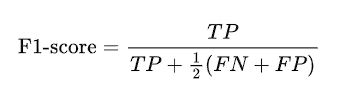

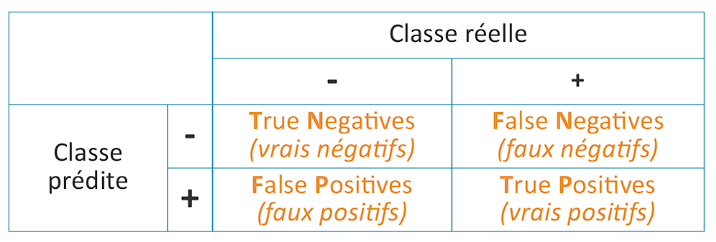

In [184]:
# Calculs de différents scores
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

# print('Accuracy (TP+TN/Total) :', round(accuracy_score(y_test_knn, y_pred_knn)*100, 3), '%')
print('Précision (TP/TP+FP) :', round(precision_score(y_test_knn, y_pred_knn)*100, 3), '%')
print('Recall (TP/TP+FN) :', round(recall_score(y_test_knn, y_pred_knn)*100, 3), '%')
print('')
print('Le F1 score de notre modèle sur les données Test est de :', round(f1_score(y_test_knn, y_pred_knn)*100, 3), '%')

Précision (TP/TP+FP) : 98.5 %
Recall (TP/TP+FN) : 99.495 %

Le F1 score de notre modèle sur les données Test est de : 98.995 %


#### *4.2.2. Matrice de confusion (ok)*

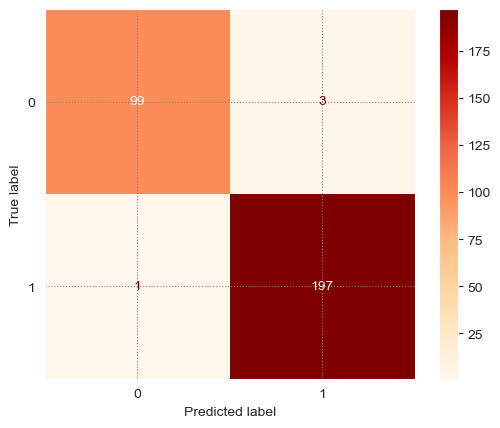

In [185]:
# Matrice de confusion entre vrai et faux positifs

# Fait sur le jeu de test (données qui n'ont pas servie à fait le modèle)

# confusion_matrix(vrai, prediction)
c_matrix = confusion_matrix(y_test_knn, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix)
disp.plot(cmap = 'OrRd')
plt.show()

In [186]:
# La matrice de confusion est similaire à celle de la régression logistique

#### *4.2.3. Courbe ROC (ok)*

In [187]:
# Explication courbe R.O.C. :

# Le terme courbe ROC signifie courbe caractéristique de fonctionnement du récepteur. Cette courbe est essentiellement une représentation graphique des performances
# de tout modèle de classification à tous les seuils de classification.

# Il y a deux paramètres de cette courbe :

# True Positive Rate (TPR) - Signifie réel, c’est-à-dire une vraie sensibilité
# Taux de faux positifs (FPR) - Signifie pseudo, c’est-à-dire fausse sensibilité
# Les deux paramètres sont appelés caractéristiques de fonctionnement et sont utilisés comme facteurs pour définir la courbe ROC.

# En Python, l’efficacité du modèle est déterminée en observant l’aire sous la courbe (AUC).
# Ainsi, le modèle le plus efficace a une AUC égale à 1, et le modèle le moins efficace a une AUC égale à 0,5.

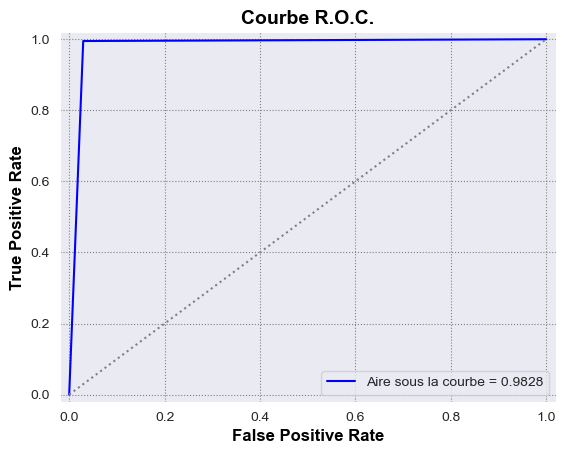

In [188]:
# Courbe R.O.C.avec données justes et prédites
fpr, tpr, _ = roc_curve(y_test_knn, y_pred_knn)
# Calcul de l'aire sous la courbe
roc_auc_knn = roc_auc_score(y_test_knn, y_pred_knn)

# Graphique
plt.title('Courbe R.O.C.', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.plot(fpr, tpr, color = 'blue', linewidth = 1.5, label = 'Aire sous la courbe = %0.4f' % roc_auc_knn)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.legend(loc = "lower right")
plt.ylabel('True Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('False Positive Rate', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [189]:
# On obtient une AUC ROC de 0.9826

#### *4.2.4. Learning / Validation Curve (pour informations) (ok)*

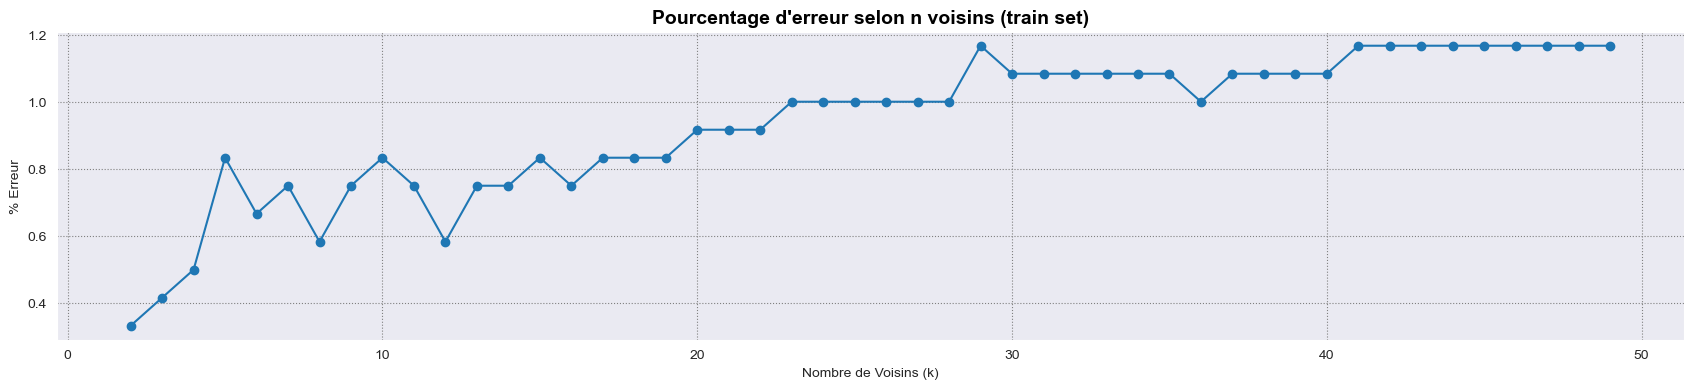

In [190]:
# Surle trainset
# Test du % d'erreur selon nombre de voisins - Source : OCR / Opti : DsFx
range_test = range(2,50) # range du test de n

errors = []

# Boucle de test pour n in range
for k in range_test:
    knn = KNeighborsClassifier(k) # On défini le nombre de voisins
    errors.append(100 *(1-knn.fit(X_train_knn, y_train_knn).score(X_train_knn, y_train_knn))) # Onfit le modèle et on récupère le score qu'on ajoute à une liste (100 x (1 - erreur)), on prend juste le score

# Graphe de l'évolution de l'erreur
plt.figure(figsize = (21,4))
plt.plot(range_test, errors, 'o-')

# plt.ylim([-0.5, 2.5])
plt.title("Pourcentage d'erreur selon n voisins (train set)", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel('Nombre de Voisins (k)')
plt.ylabel('% Erreur')

plt.show()

In [191]:
# Test pour sortir différents graphes selon le score voulu

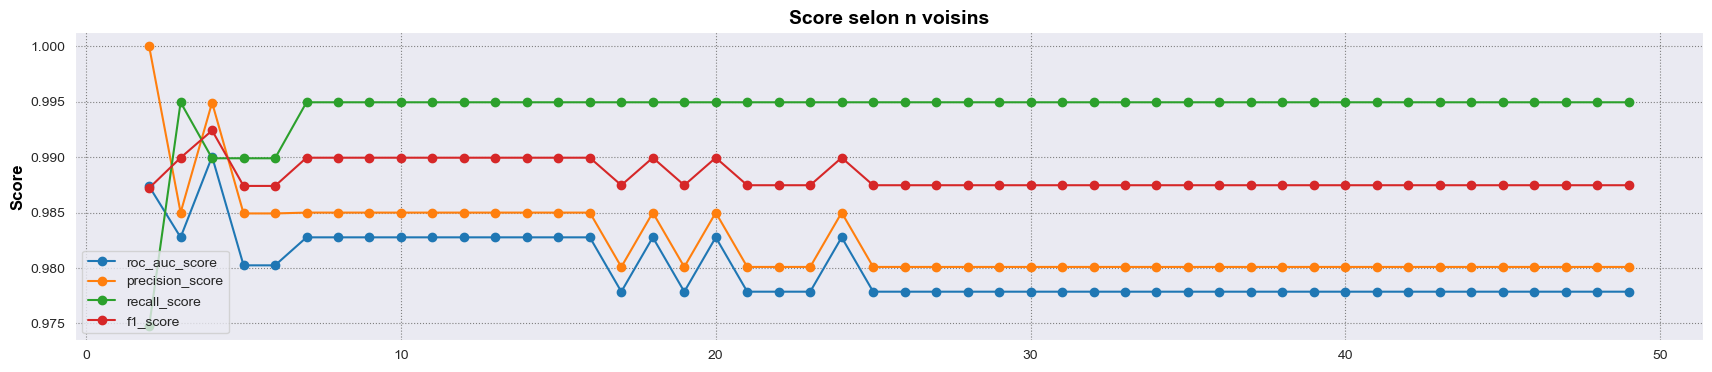

In [192]:
# Param graph
score = roc_auc_score
score1 = precision_score
score2 = recall_score
score3 = f1_score
# Nombre de voisins
range_test = range(2,50) # range du test de n
# X
X = X_test_knn
# y
y = y_test_knn

errors = []
errors1 = []
errors2 = []
errors3 = []

# Boucle de test pour n in range
for k in range_test:
    knn = KNeighborsClassifier(k) # On défini le nombre de voisins
    knn.fit(X, y) # On fit les modèles avec le nombre de voisins définis
    pred = knn.predict(X) # On fait une prédiction
    
    errors.append(score(y, pred)) # Onfit le modèle et on récupère le score

for k in range_test:
    knn = KNeighborsClassifier(k) # On défini le nombre de voisins
    knn.fit(X, y) # On fit les modèles avec le nombre de voisins définis
    pred = knn.predict(X) # On fait une prédiction
    
    errors1.append(score1(y, pred)) # Onfit le modèle et on récupère le score

for k in range_test:
    knn = KNeighborsClassifier(k) # On défini le nombre de voisins
    knn.fit(X, y) # On fit les modèles avec le nombre de voisins définis
    pred = knn.predict(X) # On fait une prédiction
    
    errors2.append(score2(y, pred)) # On fit le modèle et on récupère le score

for k in range_test:
    knn = KNeighborsClassifier(k) # On défini le nombre de voisins
    knn.fit(X, y) # On fit les modèles avec le nombre de voisins définis
    pred = knn.predict(X) # On fait une prédiction
    
    errors3.append(score3(y, pred)) # Onfit le modèle et on récupère le score

# Graphe de l'évolution de l'erreur
plt.figure(figsize = (21,4))

plt.plot(range_test, errors, 'o-')
plt.plot(range_test, errors1, 'o-')
plt.plot(range_test, errors2, 'o-')
plt.plot(range_test, errors3, 'o-')

# plt.ylim([min(errors)-0.002, max(errors)+0.002])
# plt.title((str.split(str(score), sep = ' ')[1] + " selon n voisins"), fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
# plt.xlabel('Nombre de Voisins (k)', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.title('Score selon n voisins', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Score', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})
plt.legend([str.split(str(score), sep = ' ')[1], str.split(str(score1), sep = ' ')[1], str.split(str(score2), sep = ' ')[1], str.split(str(score3), sep = ' ')[1]])

plt.show()

In [193]:
# Comment perso : Ca me fait un peu penser au fonctionnement de gridsearch ou on fait varier des paramètre et on regarde un score...

#### Curve d'évaluation plus poussées (Source : Recherche perso) (ok)

In [194]:
# Utilisation de librairies spécifiques suite à recherche et tests de codes fait manuellement
# Ceci est une partie de tests que je n'ai pas eu le temps d'approfondir, continuation prévue après hospitalisation en janvier

In [195]:
# Valeur de l'hyper param à tester
param_range = np.arange(1, 51)

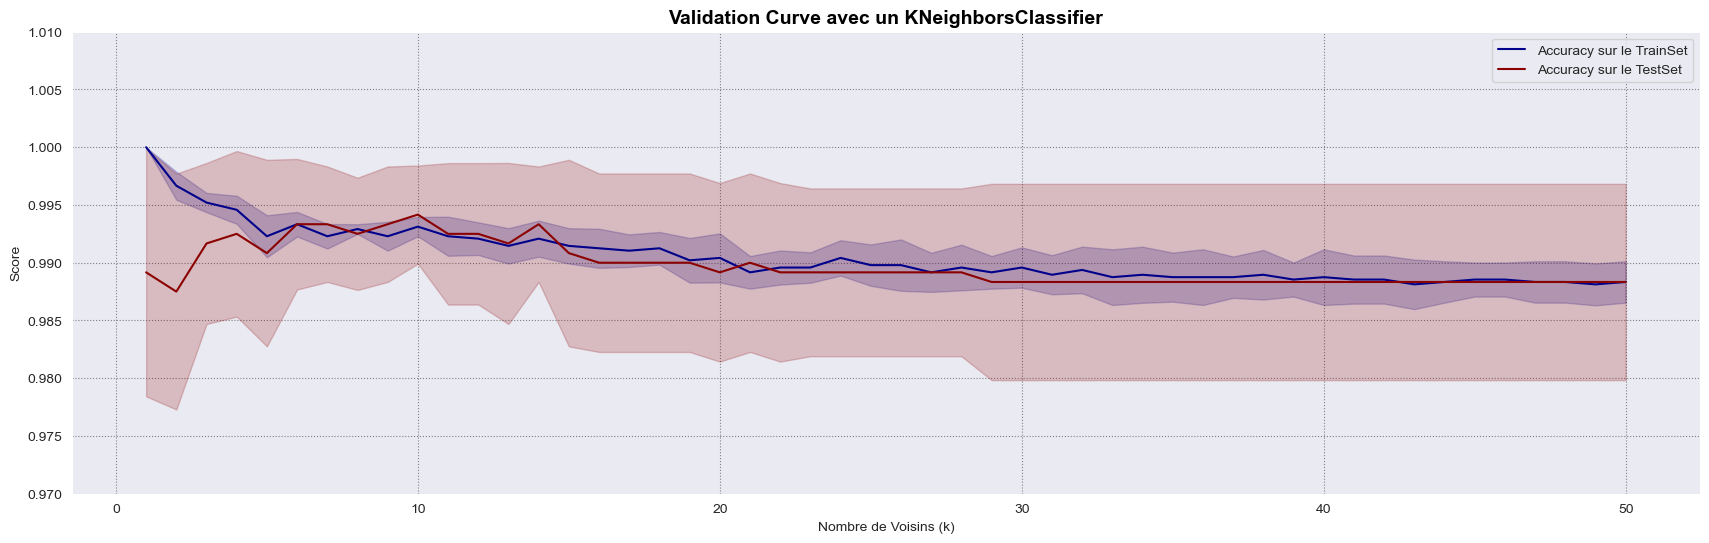

In [196]:
# On trace un graphique en faisant varier le nombre n du KNN que l'on évalue sur les jeux train et test, on récupère l'accurancy
# On fait donc varier : n

#  Utilisation de validation_curve pour analyser le modèle
from sklearn.model_selection import validation_curve

# Définir les valeurs de l'hyperparamètre à tester
# param_range = np.arange(1, 50)

# Calculer la validation croisée pour différentes valeurs de l'hyperparamètre
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train_knn, y_train_knn, param_name = "n_neighbors", param_range = param_range, cv = 5, scoring = 'accuracy')

# Calculer la moyenne et l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Tracer la courbe de validation
plt.figure(figsize = (21, 6))
plt.title("Validation Curve avec un KNeighborsClassifier", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel("Nombre de Voisins (k)")
plt.ylabel("Score")
plt.ylim(0.97, 1.01)
plt.plot(param_range, train_mean, label = "Accuracy sur le TrainSet", color = 'DarkBlue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = 'DarkBlue')
plt.plot(param_range, test_mean, label = 'Accuracy sur le TestSet', color = 'DarkRed')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = 'DarkRed')
plt.legend(loc = 'best')
plt.grid(visible = True)
plt.show()

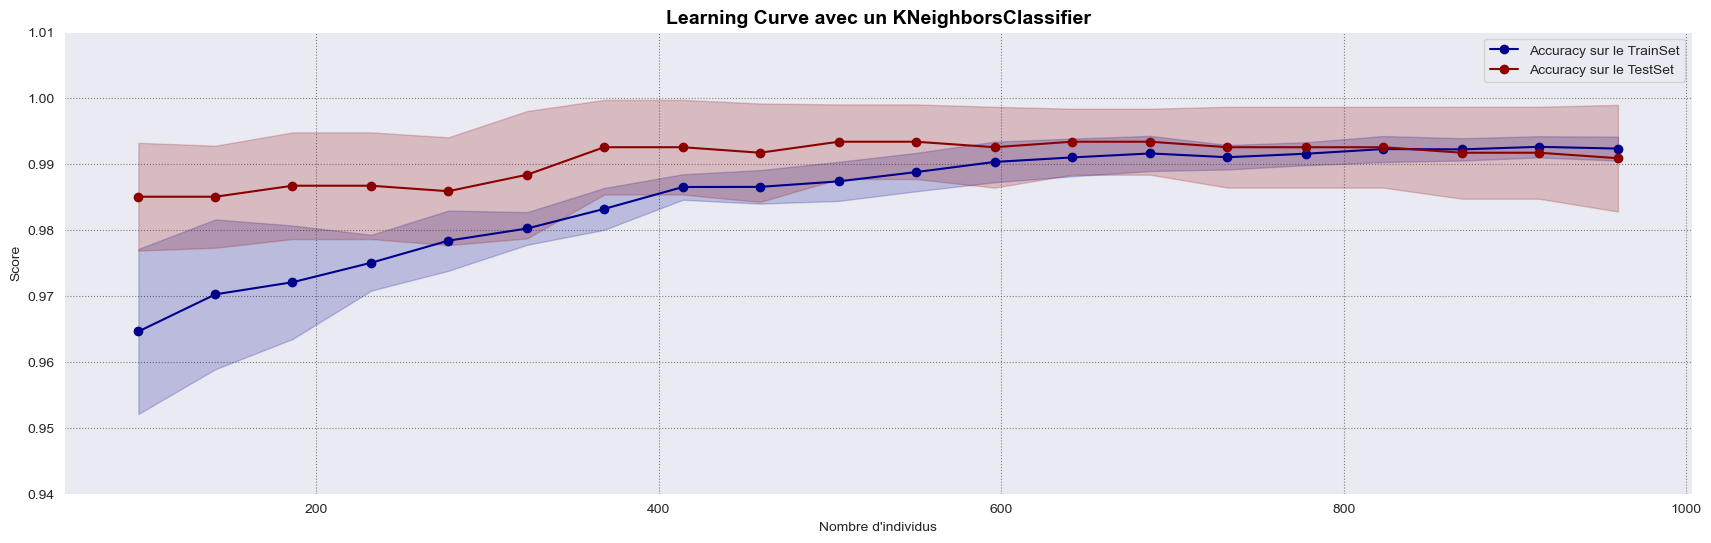

In [197]:
# On trace un graphique pour évaluer la précision du modèle selon la taille du jeu d'entrainement
# On fait donc varier : taille du train set

# Utilisation de learning_curve pour analyser le modèle
from sklearn.model_selection import learning_curve

# Définir les tailles des ensembles d'entraînement à tester
train_sizes = np.linspace(0.1, 1.0, 20)

# Calculer les courbes d'apprentissage pour différentes tailles d'ensemble d'entraînement, on part sur 5 voisins pour la visualisation
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors = 5), X_train_knn, y_train_knn, train_sizes = train_sizes, cv = 5, scoring = 'accuracy')

# Calculer la moyenne et l'écart type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(21, 6))
plt.title("Learning Curve avec un KNeighborsClassifier", fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.xlabel("Nombre d'individus")
plt.ylabel("Score")
plt.ylim(0.94, 1.01)
plt.plot(train_sizes, train_mean, 'o-', color = 'DarkBlue', label = 'Accuracy sur le TrainSet')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = 'DarkBlue')
plt.plot(train_sizes, test_mean, 'o-', color = 'DarkRed', label = 'Accuracy sur le TestSet')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = 'DarkRed')
plt.legend(loc = 'best')
plt.grid(visible = True)
plt.show()

### *4.3. Sauvegarde du modèle KNN (ok)*

In [198]:
# On regarde quelle a été le meilleur score obtenu en croisant les différents paramètres
print("Le meilleur score obtenu avec les données d'entrainement est de :", round(grid.best_score_*100, 4), '%')
print('Meilleurs paramètres pour ce score :', grid.best_params_)

Le meilleur score obtenu avec les données d'entrainement est de : 99.4167 %
Meilleurs paramètres pour ce score : {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [199]:
# On enregistre le modèle et les paramètres dans une variable
model_knn = grid.best_estimator_
# On regarde les paramètres du modèle
model_knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [200]:
# On stock notre modèle avec joblib pour le réustiliser plus tard

# On instancie notre fonction dans une variable
model_04 = model_knn

# On regarde que le modèle est bien en mémoire ainsi que les paramètres
display('Modèle utilisé :', model_knn)
display(model_knn.get_params(deep=True))

# On stocke dans un fichier joblib
# (nom de la fonction, nom du fichier)
joblib.dump(model_04, 'model_04.joblib')

'Modèle utilisé :'

KNeighborsClassifier(n_neighbors=10)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

['model_04.joblib']

---
# Partie 3 - Sélection du modèle (ok)

In [201]:
# Print des différents scores pour comparaison (score basés sur les jeux de test des modèles
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

# Scores retenus pour la régression logistique
print('Regression logistique')
print('')
print('AUC ROC Reg. Log. :', round(roc_auc_rlog*100, 3), '%')
print('Score global :', round(model_reg_logit.score(X_test_rlog, y_test_rlog)*100, 3), '%')

# print('Accurancy (TP+TN/Total) :', round(accuracy_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
# print('Précision (TP/TP+FP) :', round(precision_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
# print('Recall (TP/TP+FN) :', round(recall_score(y_test_rlog, y_pred_rlog)*100, 3), '%')

print('Le F1 score de notre model :', round(f1_score(y_test_rlog, y_pred_rlog)*100, 3), '%')
print('')
print('')

# Scores retenus pour KMeans
print('KMeans')
print('')
print('AUC ROC Kmeans :', round(roc_auc_km*100, 3), '%')
print('Score global : Pas de score dispo')

print('Accurancy (TP+TN/Total) :', round(accuracy_score(y_test_km, df_pred_km)*100, 3), '%')
# print('Précision (TP/TP+FP) :', round(precision_score(y_test_km, df_pred_km)*100, 3), '%')
# print('Recall (TP/TP+FN) :', round(recall_score(y_test_km, df_pred_km)*100, 3), '%')

print('Le F1 score de notre model :', round(f1_score(y_test_km, df_pred_km)*100, 3), '%')
print('')
print('')

# Scores retenus pour KNN
print('KNN')
print('')
print('AUC ROC KNN :', round(roc_auc_knn*100, 3), '%')
print('Score global :', round(model_knn.score(X_test_knn, y_test_knn)*100, 3), '%')

# print('Accuracy (TP+TN/Total) :', round(accuracy_score(y_test_knn, y_pred_knn)*100, 3), '%')
# print('Précision (TP/TP+FP) :', round(precision_score(y_test_knn, y_pred_knn)*100, 2), '%')
# print('Recall (TP/TP+FN) :', round(recall_score(y_test_knn, y_pred_knn)*100, 3), '%')

print('Le F1 score de notre model :', round(f1_score(y_test_knn, y_pred_knn)*100, 3), '%')
print('')

print('Pour plus de détails, se référer aux Markdown : "Evaluation du modèle" pour les modèles concernés')

Regression logistique

AUC ROC Reg. Log. : 98.277 %
Score global : 98.667 %
Le F1 score de notre model : 98.995 %


KMeans

AUC ROC Kmeans : 97.029 %
Score global : Pas de score dispo
Accurancy (TP+TN/Total) : 97.333 %
Le F1 score de notre model : 97.98 %


KNN

AUC ROC KNN : 98.277 %
Score global : 98.667 %
Le F1 score de notre model : 98.995 %

Pour plus de détails, se référer aux Markdown : "Evaluation du modèle" pour les modèles concernés


C:\Users\david\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [202]:
# En comparant ces 3 modèles, on remarque premièrement qu'ils ont de très bon scores
# Toutefois, KMeans est en retrait par rapport au deux autres, pour comparer le score global de KMeans aux autres modèles, on peut prendre l'accuracy qui est équivalente

# A première vue, la régression logistique et KNN sont équivalent

# Donc, pour notre programme de détection des billets, nous prendrons donc notre régression logistique entrainée sur un train set et enregistré avec joblib afin d'être réutilisé dans un autre book
# Nous choisissons ce modèle car en cas d'ajout de nouvelles données d'entrainement, il demande moins de ressources que KNN

In [203]:
# Coding by : David GESSER
# 28/12/2023